# CAR PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore

#sklearn 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

#models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Ensamble models
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor

# Bagging Regressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor

#neural networks
from sklearn.neural_network import MLPRegressor

#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Cardata.csv")

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df=pd.DataFrame(data=df)

In [4]:
df.head()

Unnamed: 0.1  Unnamed: 0   Brand   Model               Varient  Make_Year  \
0             0           0  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016   
1             1           1  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019   
2             2           2  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019   
3             3           3  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016   
4             4           4  Maruti  Baleno      DELTA PETROL 1.2       2019   

   Kilometer Fuel_Type     Owners Location      Price  
0  14,808 km    Petrol  2nd Owner    DL-5C   5,25,199  
1  25,641 km    Petrol  1st Owner    HR-26   6,63,199  
2  43,970 km    Petrol  1st Owner    DL-10   6,39,999  
3  40,552 km    Petrol  1st Owner    DL-2C   5,07,299  
4  13,397 km    Petrol  1st Owner    DL-5C   6,19,099

In [5]:
df.tail()

Unnamed: 0.1  Unnamed: 0    Brand   Model            Varient  Make_Year  \
5284          5284         963   Maruti  Baleno   DELTA PETROL 1.2       2021   
5285          5285         964  Hyundai   GRAND  ERA PETROL MANUAL       2021   
5286          5286         965   Maruti  Baleno   ALPHA PETROL 1.2       2020   
5287          5287         966   Maruti    Alto         VXI MANUAL       2021   
5288          5288         967   Maruti       A         VXI MANUAL       2012   

      Kilometer Fuel_Type     Owners Location      Price  
5284  16,803 km    Petrol  1st Owner    DL-2C   7,43,799  
5285   9,901 km    Petrol  1st Owner    UP-16   5,78,599  
5286  26,001 km    Petrol  1st Owner    HR-51   7,85,899  
5287   1,791 km    Petrol  1st Owner    UP-14   4,22,999  
5288  31,842 km    Petrol  1st Owner    HR-26   2,66,599

In [6]:
df.shape

(5289, 11)

In [7]:
#dropped the meaningless columns.
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head()

Brand   Model               Varient  Make_Year  Kilometer Fuel_Type  \
0  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016  14,808 km    Petrol   
1  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019  25,641 km    Petrol   
2  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019  43,970 km    Petrol   
3  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016  40,552 km    Petrol   
4  Maruti  Baleno      DELTA PETROL 1.2       2019  13,397 km    Petrol   

      Owners Location      Price  
0  2nd Owner    DL-5C   5,25,199  
1  1st Owner    HR-26   6,63,199  
2  1st Owner    DL-10   6,39,999  
3  1st Owner    DL-2C   5,07,299  
4  1st Owner    DL-5C   6,19,099

In [9]:
df.shape

(5289, 9)

In [10]:
df.columns

Index(['Brand', 'Model', 'Varient', 'Make_Year', 'Kilometer', 'Fuel_Type',
       'Owners', 'Location', 'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      5289 non-null   object
 1   Model      5289 non-null   object
 2   Varient    5289 non-null   object
 3   Make_Year  5289 non-null   int64 
 4   Kilometer  5289 non-null   object
 5   Fuel_Type  5289 non-null   object
 6   Owners     5289 non-null   object
 7   Location   5289 non-null   object
 8   Price      5289 non-null   object
dtypes: int64(1), object(8)
memory usage: 372.0+ KB


- NOTE:
1. One Integer Column
2. Eight Object Columns
3. Null Float Columns


- Target variable shows Price as object

In [12]:
#changing target variable to int
df["Price"]= [int(i.replace(",","")) for i in df['Price']]
df.head(5)

Brand   Model               Varient  Make_Year  Kilometer Fuel_Type  \
0  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016  14,808 km    Petrol   
1  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019  25,641 km    Petrol   
2  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019  43,970 km    Petrol   
3  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016  40,552 km    Petrol   
4  Maruti  Baleno      DELTA PETROL 1.2       2019  13,397 km    Petrol   

      Owners Location   Price  
0  2nd Owner    DL-5C  525199  
1  1st Owner    HR-26  663199  
2  1st Owner    DL-10  639999  
3  1st Owner    DL-2C  507299  
4  1st Owner    DL-5C  619099

In [13]:
# replace str to int
df['Kilometer']=[str(i.replace("km","")) for i in df['Kilometer']]
df['Kilometer']=[int(i.replace(",","")) for i in df['Kilometer']]

In [14]:
df.head(5)

Brand   Model               Varient  Make_Year  Kilometer Fuel_Type  \
0  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016      14808    Petrol   
1  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019      25641    Petrol   
2  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019      43970    Petrol   
3  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016      40552    Petrol   
4  Maruti  Baleno      DELTA PETROL 1.2       2019      13397    Petrol   

      Owners Location   Price  
0  2nd Owner    DL-5C  525199  
1  1st Owner    HR-26  663199  
2  1st Owner    DL-10  639999  
3  1st Owner    DL-2C  507299  
4  1st Owner    DL-5C  619099

### Unique Values

In [15]:
for i in df.columns:
    if df[i].dtype=="object":
        print("COLUMN NAME", i)
        print(df[i].unique())
        print("*****"*10)

COLUMN NAME Brand
['Maruti' 'Mahindra' 'Ford' 'Kia' 'Hyundai' 'Renault' 'Honda' 'Tata'
 'Toyota' 'Volkswagen' 'Audi' 'Jeep' 'Mg' 'Jaguar' 'Nissan' 'Skoda'
 'Datsun' 'Bmw' 'Mercedes Benz' 'Fiat']
**************************************************
COLUMN NAME Model
['Baleno' 'IGNIS' 'Ciaz' 'Scorpio' 'Ecosport' 'A' 'Alto' 'SELTOS' 'i10'
 'S' 'Creta' 'Swift' 'Kwid' 'City' 'New' 'Hexa' 'ALTROZ' 'Grand' 'VENUE'
 'NEW' 'Etios' 'YARIS' 'Celerio' 'Eon' 'Tiago' 'Verna' 'Dzire' 'Wagon'
 'Duster' 'Harrier' 'TIGUAN' 'Kuv100' 'Amaze' 'Jazz' 'NEXON' 'AURA'
 'GRAND' 'Corolla' 'XL6' 'Q5' 'Compass' 'Elite' 'Kiger' 'Thar' 'Vento'
 'Vitara' 'HECTOR' 'Polo' 'Brio' 'XF' 'Ritz' 'MAGNITE' 'WR-V' 'Glanza'
 'Rapid' 'Go' 'Q3' 'SONET' 'TIGOR' 'Redi' 'Figo' 'Ertiga' 'i20' 'Xcent'
 'Fortuner' 'Santro' 'Safari' 'ALCAZAR' 'URBAN' 'Eeco' 'XUV500' 'Pulse'
 'KUSHAQ' 'PUNCH' 'XUV' 'TUV300' 'Zen' 'TRIBER' 'Terrano' 'MARAZZO'
 'Micra' 'Zest' 'Civic' 'Innova' 'Ameo' 'OMNI' '5' 'CRV' 'Endeavour'
 'Octavia' 'Tucson' 'TAIGUN' 

In [16]:
for i in df.columns:
    if df[i].dtype=='int64':
        print("COLUMN NAME",i)
        print(df[i].unique())
        print("*****"*10)

COLUMN NAME Make_Year
[2016 2019 2021 2018 2017 2020 2015 2009 2022 2012 2014 2013 2010 2011]
**************************************************
COLUMN NAME Kilometer
[14808 25641 43970 ... 16803  9901 31842]
**************************************************
COLUMN NAME Price
[525199 663199 639999 ... 743799 785899 422999]
**************************************************


### OBSERVATION FOR UNIQUE

- NO NAN VALUES

## Checking Duplicated Rows

In [17]:
df.duplicated().sum()

1823

In [18]:
# first Match
df[df.duplicated(keep='first')].shape[0]

1823

In [19]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Observations:

- Observation Shows Duplicated Rows.
- row 1978, 1978 are quite similar


### Null Values

In [20]:
# Total null values
missing_value=df.isnull().sum()

# Missing Percentage
missing_percentage=df.isnull().sum()/df.shape[0]*100

view=pd.DataFrame(data={"Missing Values":missing_value,"Missing Percentage":missing_percentage},index=None)
view

Missing Values  Missing Percentage
Brand                   0                 0.0
Model                   0                 0.0
Varient                 0                 0.0
Make_Year               0                 0.0
Kilometer               0                 0.0
Fuel_Type               0                 0.0
Owners                  0                 0.0
Location                0                 0.0
Price                   0                 0.0

### Visualization Null Values

<AxesSubplot:>

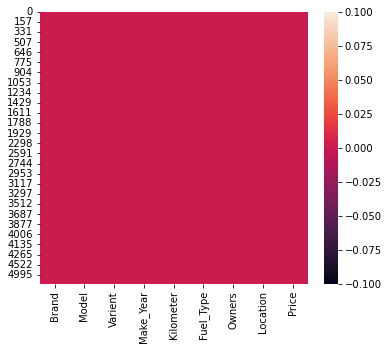

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(df.isnull())

## Observation

- Rows Shows No null DATA

## Feature Engineering:

In [22]:
# column shows first two letter
df['State']=df['Location'].str[:2]
# New column Shows first three letter
df['Owners']=df['Owners'].str[:1]
# dropping the old as new column created
df.drop(['Location'],inplace=True,axis=1)
df.head(2)

Brand   Model               Varient  Make_Year  Kilometer Fuel_Type  \
0  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2016      14808    Petrol   
1  Maruti  Baleno  DELTA 1.2 K12 MANUAL       2019      25641    Petrol   

  Owners   Price State  
0      2  525199    DL  
1      1  663199    HR

## EDA("Exploratory Data Analysis")

### Univariate Analysis

Maruti     1400
Hyundai     828
Honda       281
Tata        173
Renault     165
Name: Brand, dtype: int64 
 ****************************************
Alto      263
Swift     235
Baleno    215
Grand     156
Wagon     155
Name: Model, dtype: int64 
 ****************************************
VXI MANUAL                      346
LXI MANUAL                      162
DELTA 1.2 K12 MANUAL            103
SPORTZ 1.2 KAPPA VTVT MANUAL     66
ZXI MANUAL                       48
Name: Varient, dtype: int64 
 ****************************************
2018    561
2019    558
2020    457
2017    428
2021    408
Name: Make_Year, dtype: int64 
 ****************************************
28696    3
21853    3
86746    2
17290    2
50657    2
Name: Kilometer, dtype: int64 
 ****************************************
Petrol          2730
Diesel           553
Petrol + CNG     183
Name: Fuel_Type, dtype: int64 
 ****************************************
1    2689
2     718
3      59
Name: Owners, dtype: int64 
 *****

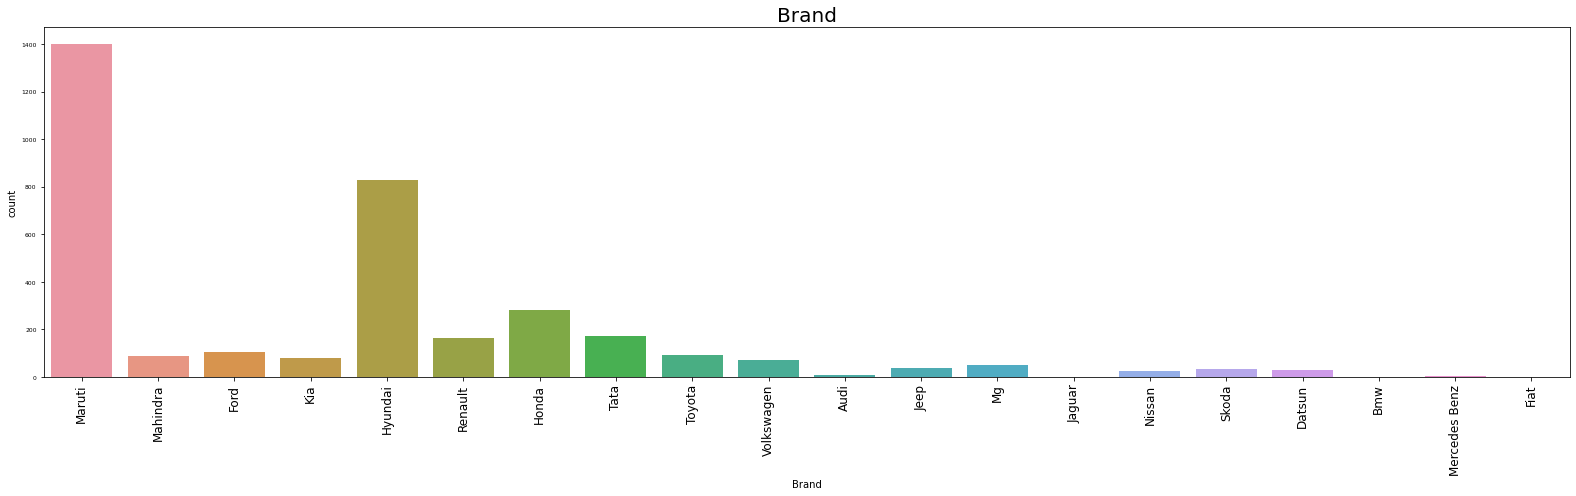

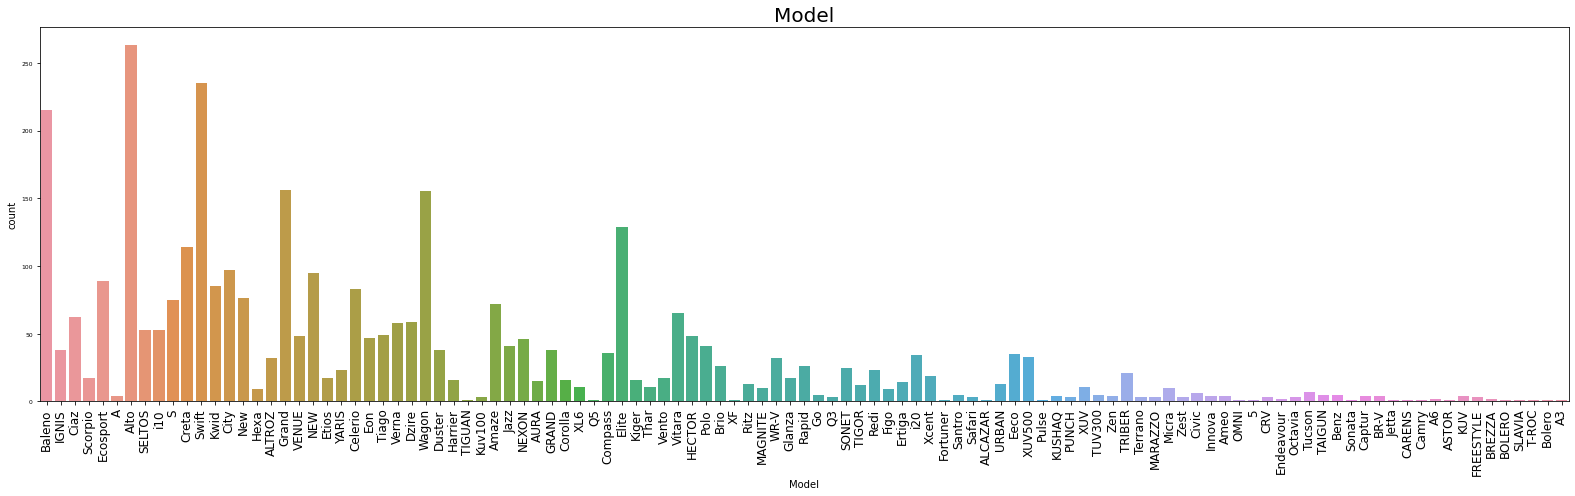

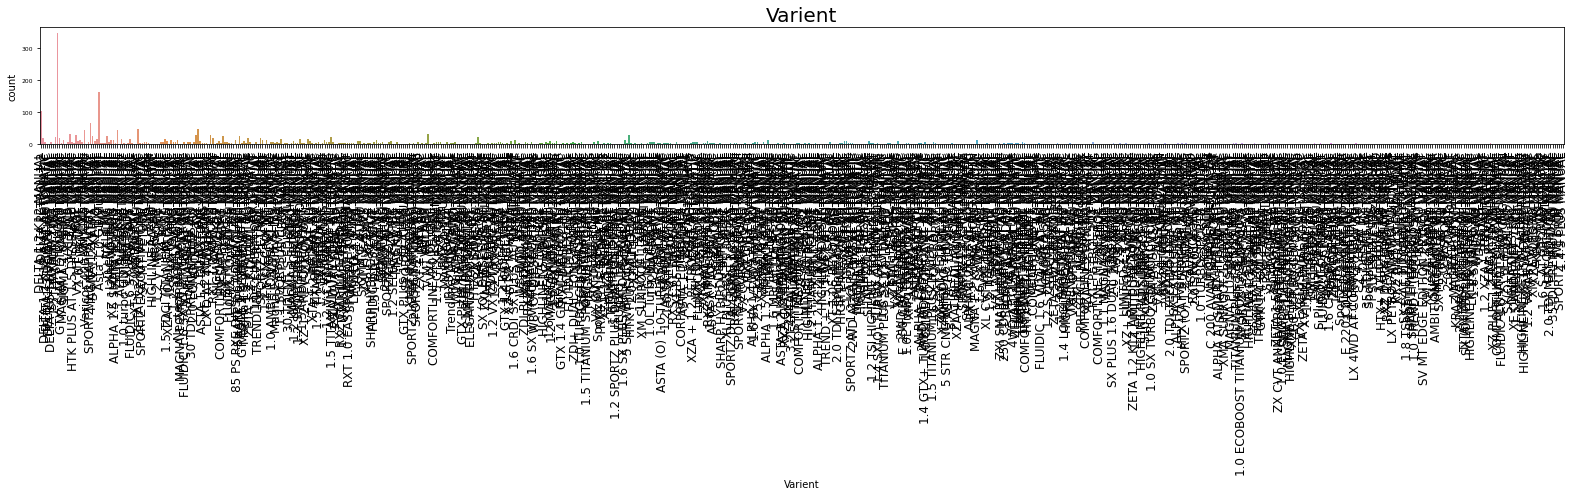

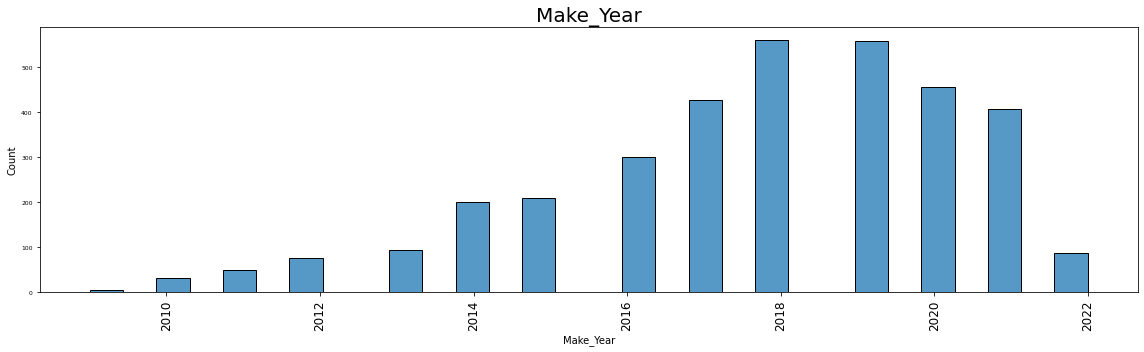

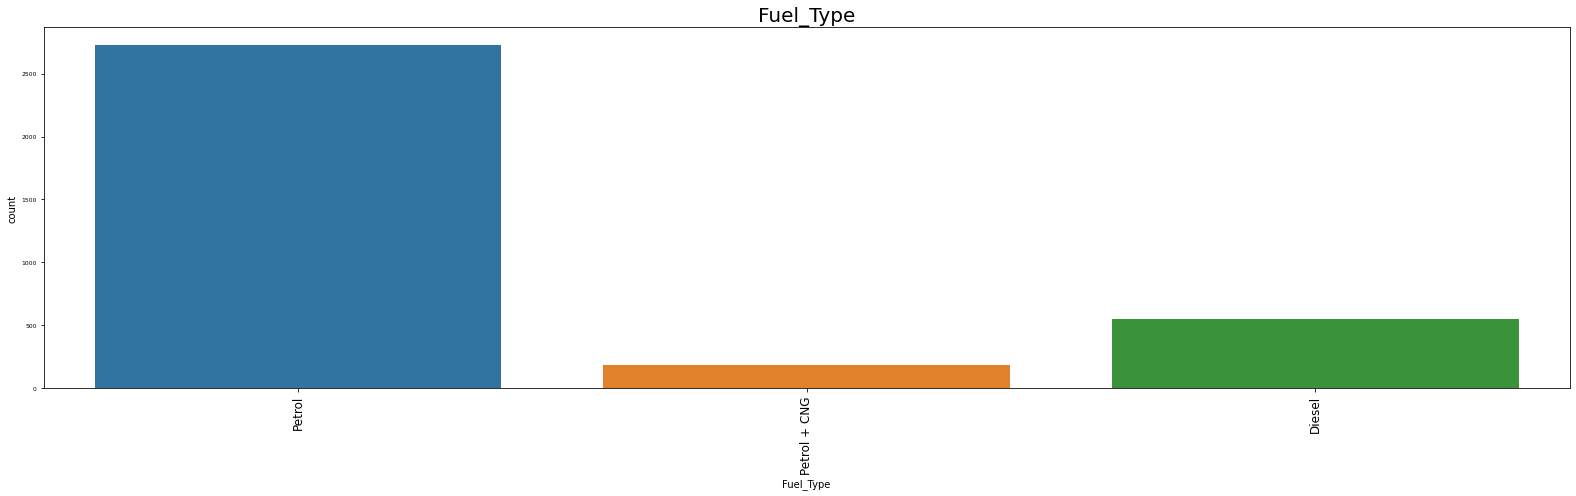

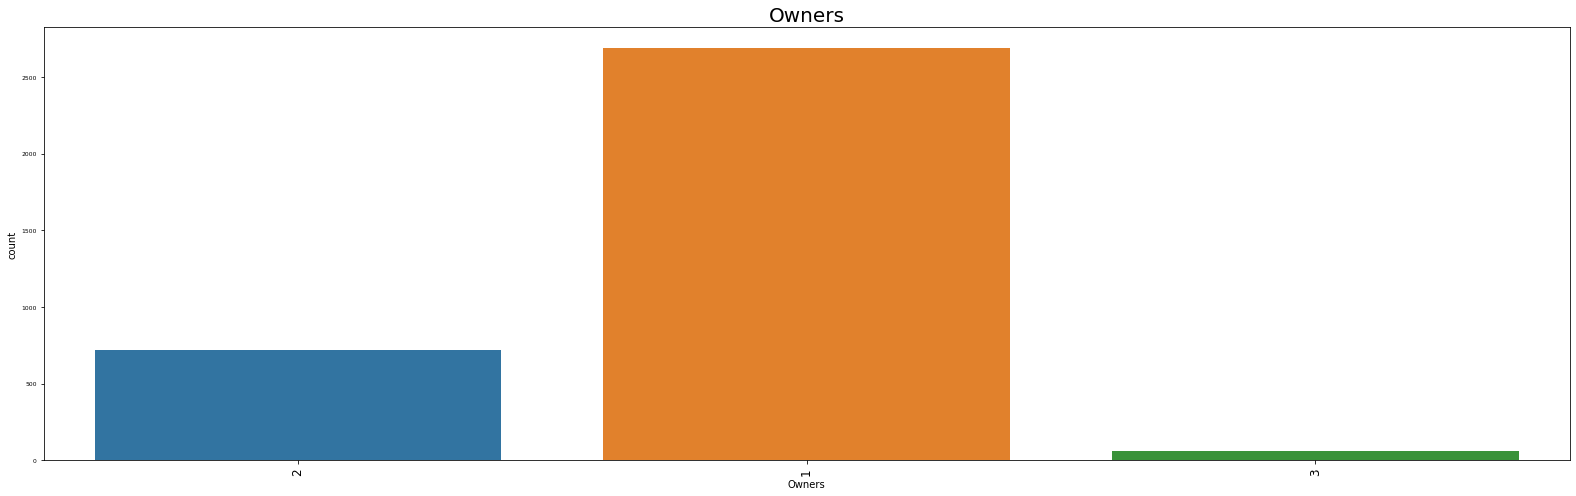

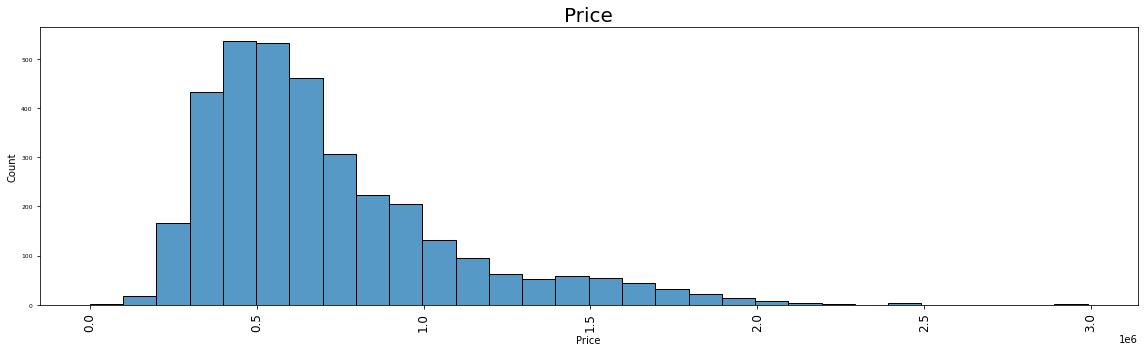

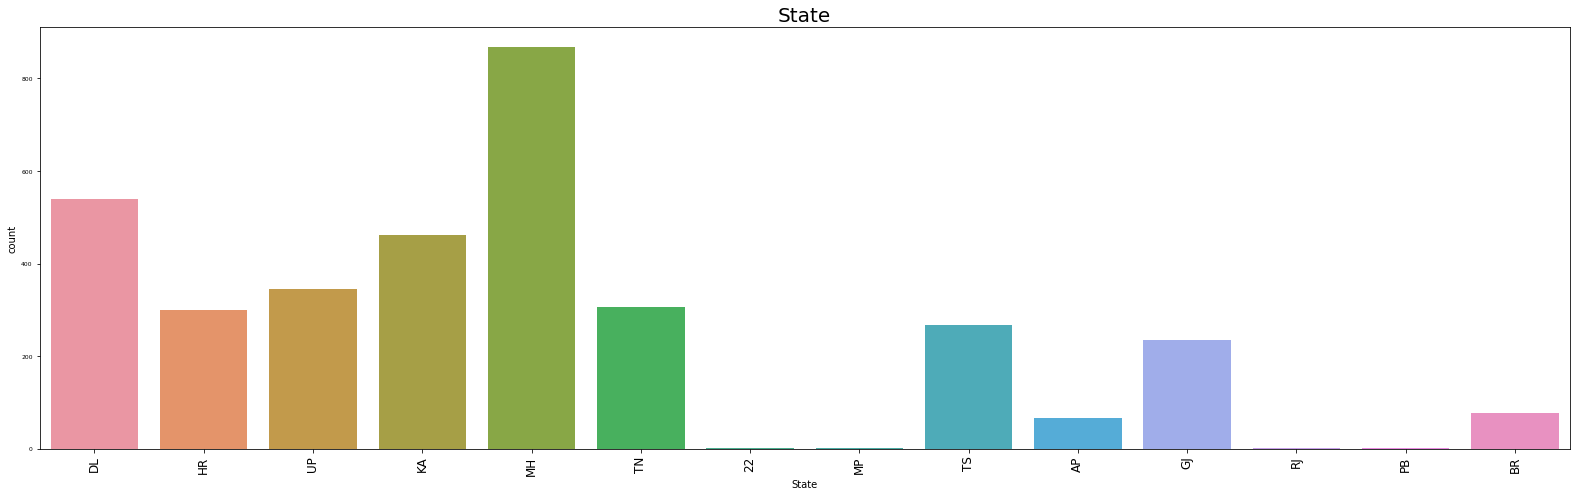

In [24]:
for i in df.columns:
    if df[i].dtype=="object":
        plt.figure(figsize=(22,7))
        plt.title(i,fontsize=20)
        print(df[i].value_counts()[:5],"\n","****"*10)
        sns.countplot(x=i,data=df)
        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(rotation=0,fontsize=6)
        plt.tight_layout()
    else:
        plt.figure(figsize=(16,5))
        plt.title(i,fontsize=20)
        print(df[i].value_counts()[:5],"\n","****"*10)
        sns.histplot(x=i,data=df,bins=30)
        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(rotation=0,fontsize=6)
        plt.tight_layout()

## Observations:

- Maruti Car (Brand) are for sale.
- Alto and Swift models cars are in maximum for sale.
- VXI and LXI variants are maximum for sale.
- Cars that are maximum for sale are in Make year between 2018 to 2019
- Maximum car are for sale lies between 40,000 to 50,000 km.
- Petrol cars are maximum for sale, Petrol + CNG cars are very less for sale.
- Maximum Sales are 1st Owners, followed by 2nd Owners.
- Delhi and Karnataka cars are maximum for sale.
- Maximum sellers lies between 3 lakhs to 5 lakhs

## Bi-variate Analysis

### Using Catplot

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

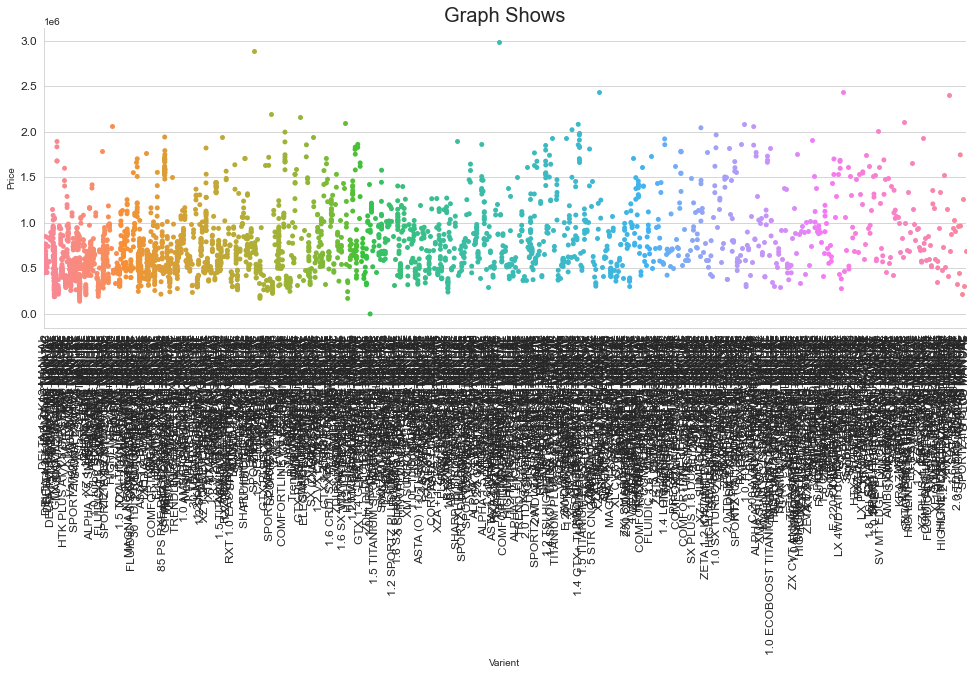

<Figure size 1296x720 with 0 Axes>

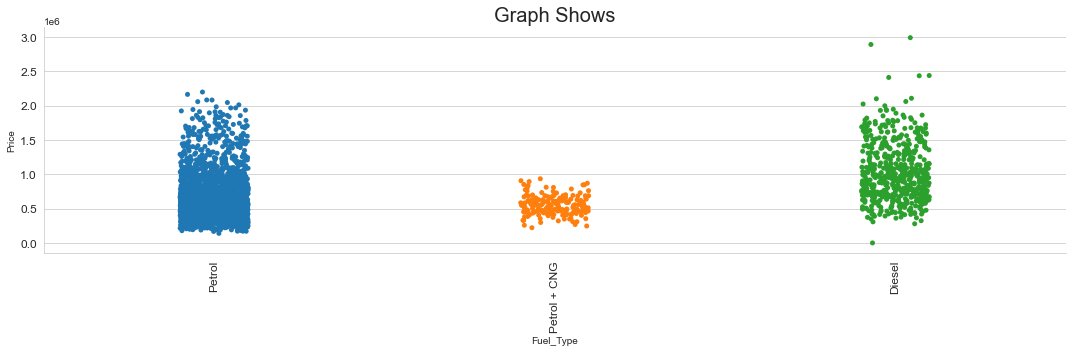

<Figure size 1296x720 with 0 Axes>

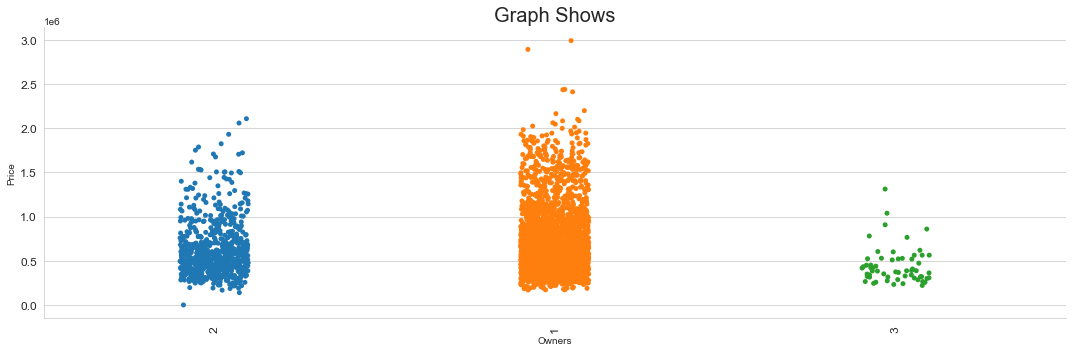

<Figure size 1296x720 with 0 Axes>

In [25]:
for i in df.columns:
    if df[i].dtypes=='object':
        sns.set_style("whitegrid")
        plt.figure(figsize=(18,10))
        sns.catplot(x=i,data=df,y='Price',aspect=3)
        plt.title("Graph Shows",fontsize=20)
        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(rotation=0,fontsize=12)
        plt.tight_layout()

### Using-Scatter Plot

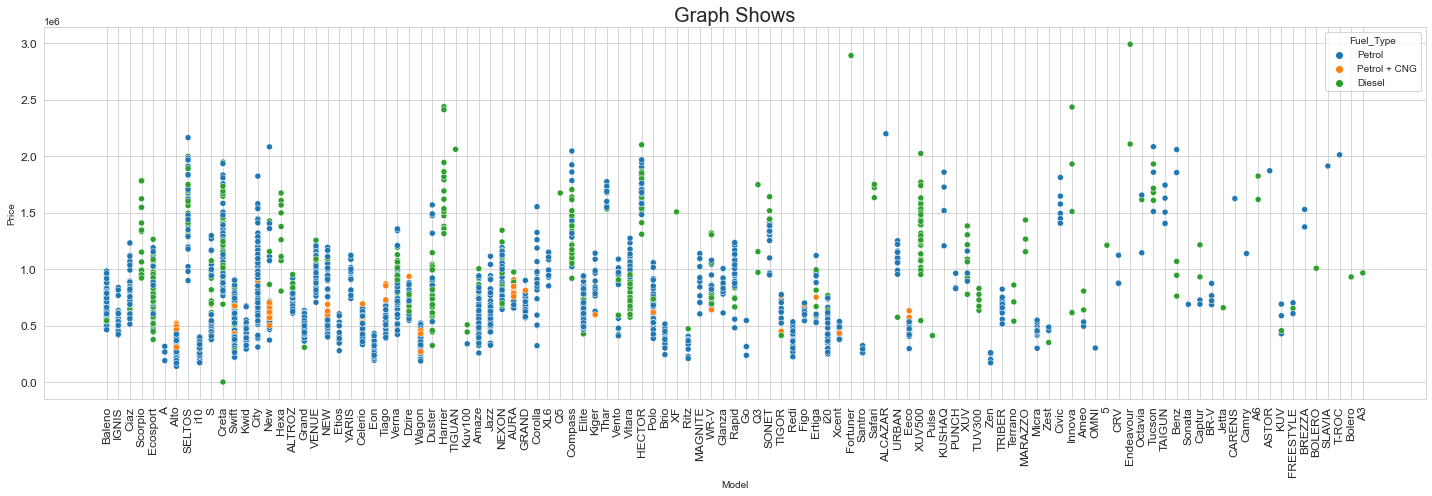

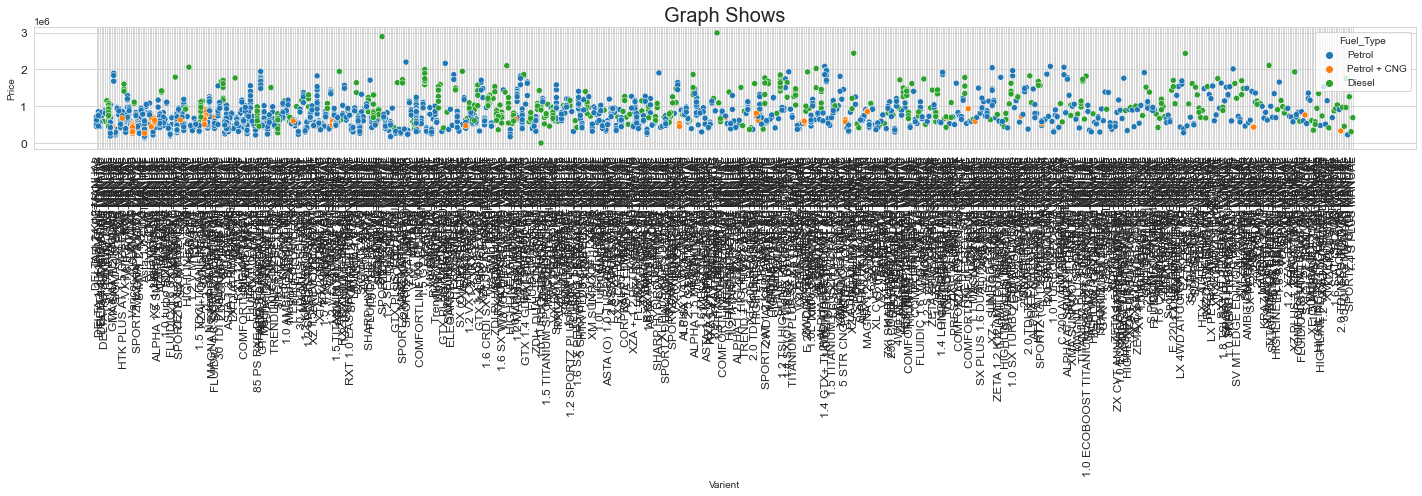

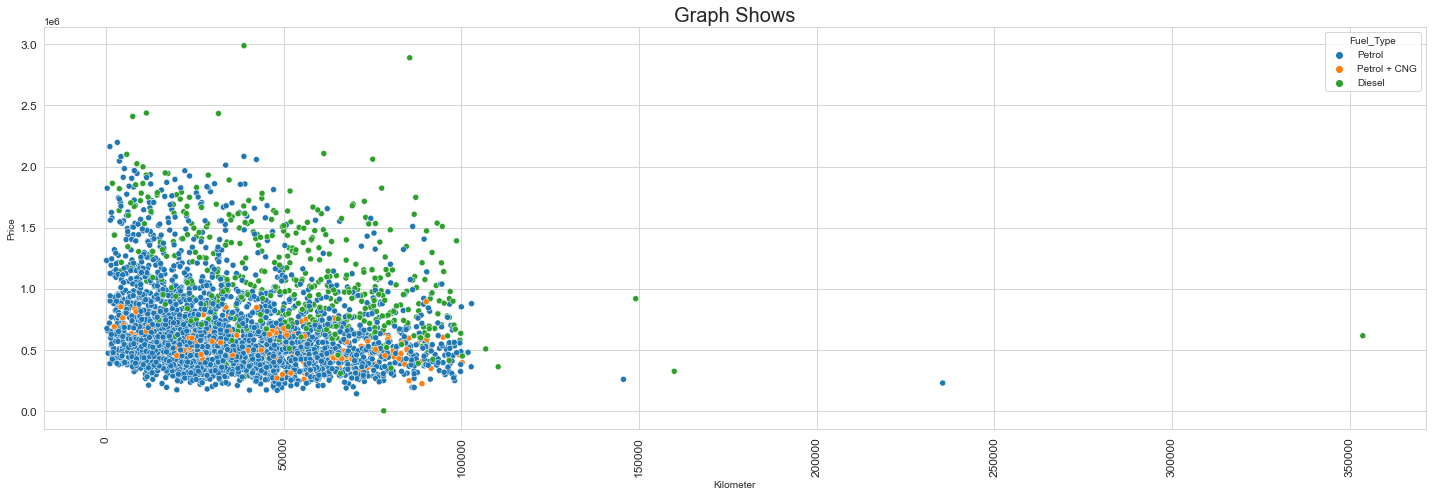

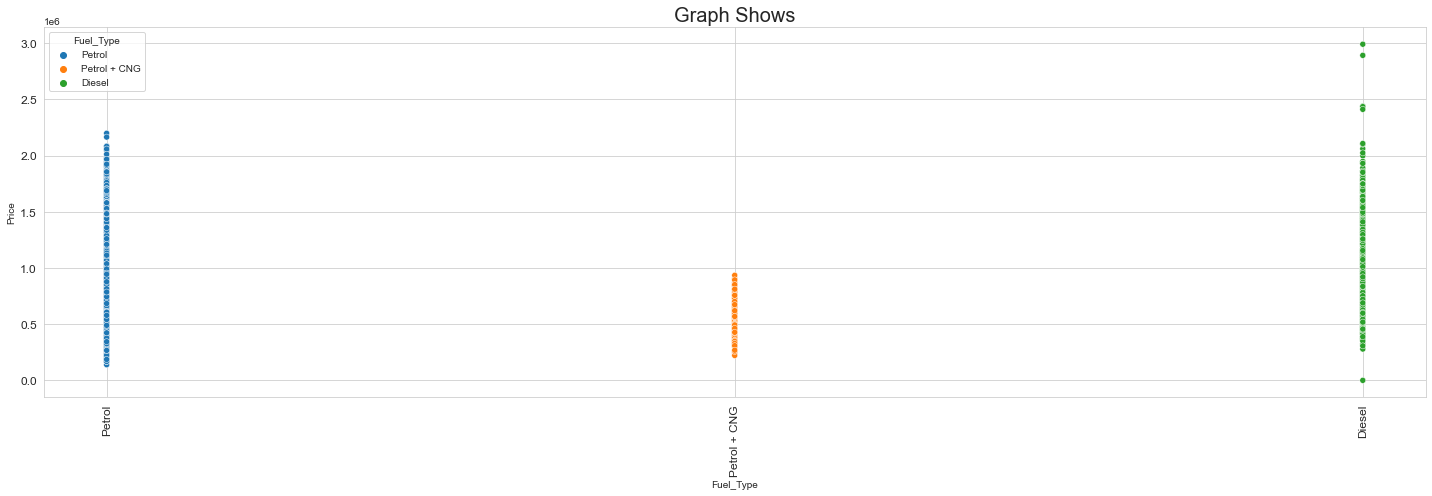

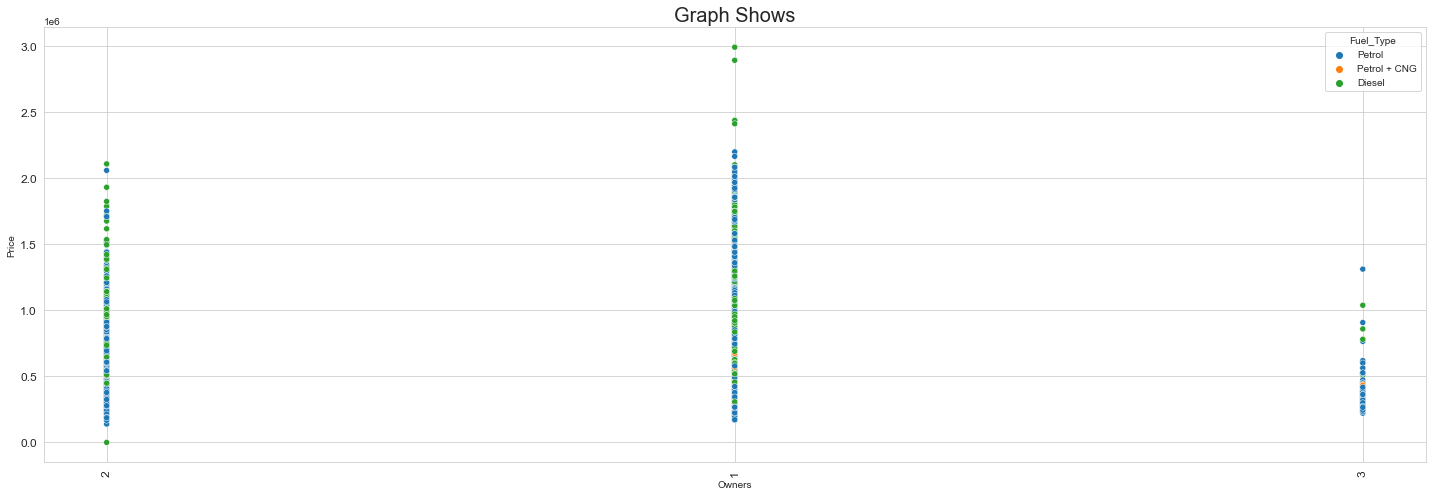

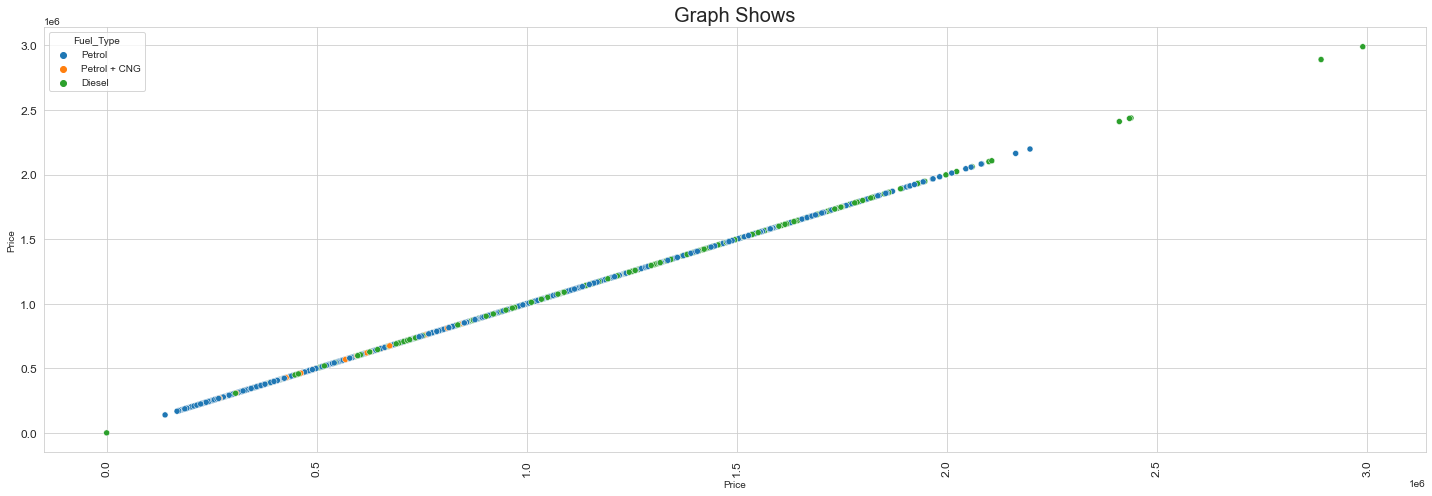

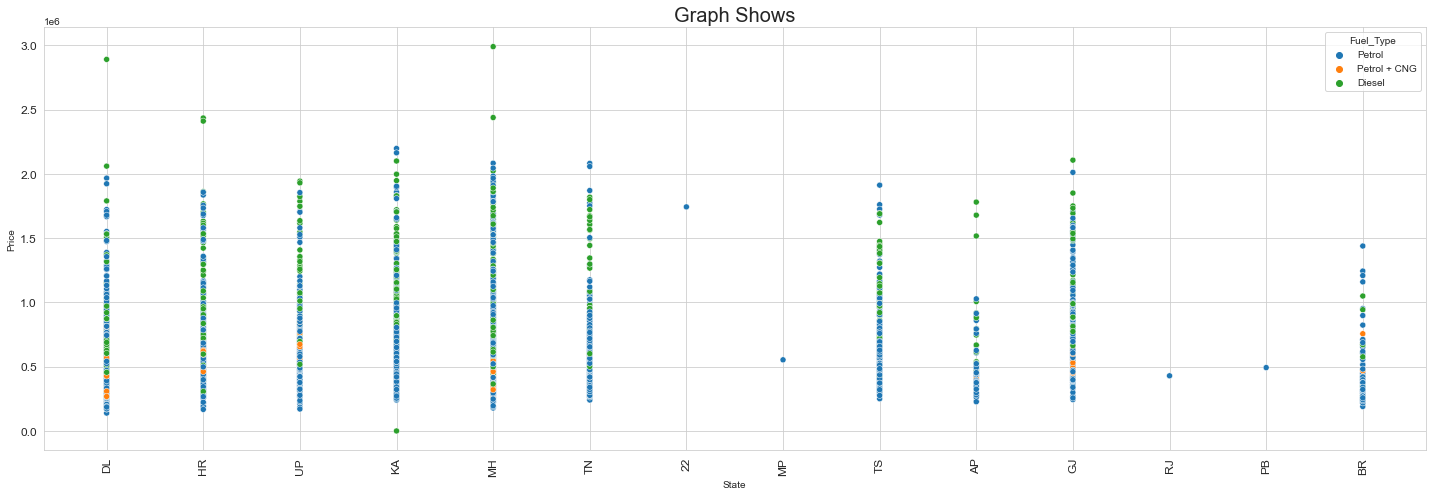

In [26]:
for i in df.columns:
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,7))
    sns.scatterplot(x=i,data=df,y='Price',hue='Fuel_Type')
    plt.title("Graph Shows",fontsize=20)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    plt.tight_layout()

## Observation Shows:

- Diesel car prices are high as compare to petrol or model with petrol and cng.
- 1st Owner sells their cars in high price.
- Datsun Peice are low, Toyota ,Ford shows maximum prices for sale.
- Maruti and Tata and Hyundai prices are low deviation.
- Endeavour, Fortuner prices are high compare to others,  Harrier,compass and XUV 500 shows high price cars
- Maximum sale of petrol cars in 2020 followed 2022.
- Price of Petrol Cars are high if the kilometers are less.
- Gujrat has maximum sellers of petrol cars.
- UP,KA,MH,HR,TN,DL,TS,AP,WB has maximum Diesel cars.
- HR,KA,GJ having prices for diesal cars
- Maximum price can be noticed for HR,MH,DL for diesel
- Endevor and fortuner have high selling values.
- High price value for first owner car.

In [28]:
B_state=df.groupby(['State','Brand'],squeeze=['State']).sum().reset_index()
print("Brand Counts Per State")
B_state

Brand Counts Per State


State          Brand  Make_Year  Kilometer      Price
0      22     Volkswagen       2022       3504    1743099
1      AP           Ford       4028     158100    1279998
2      AP          Honda       6040     237360    1196397
3      AP        Hyundai      38268     990861    8764181
4      AP           Jeep       2019      50070    1516699
5      AP       Mahindra       6061     158967    3705797
6      AP         Maruti      56429    1711310   13181392
7      AP             Mg       2020      69314    1678799
8      AP         Nissan       4028     157417     992498
9      AP        Renault       2018      42192     389199
10     AP          Skoda       4038      96965    1637898
11     AP         Toyota       4022     175275     943298
12     AP     Volkswagen       2021      21965     914599
13     BR           Ford       2017      35454     576699
14     BR          Honda      16123     459824    4197092
15     BR        Hyundai      40302     787343    8394430
16     BR           Jeep       2018      22919    1049699
17     BR            Kia       4038      30988    2336698
18     BR       Mahindra       6054     141832    2773697
19     BR         Maruti      78645    1195746   15904361
20     BR        Renault       2020      46529     514299
21     BR           Tata       4038      97111    1173798
22     DL           Audi       6043     174388    3798997
23     DL         Datsun       6057      58135    1220497
24     DL           Ford      36306     998187   11546082
25     DL          Honda      74623    1644124   25566413
26     DL        Hyundai     221846    4706178   64589890
27     DL         Jaguar       2013      28289    1505999
28     DL           Jeep       4036      61222    3292998
29     DL            Kia       6060      32330    4440247
30     DL       Mahindra      16146     294497    7571142
31     DL         Maruti     532572    9628684  131227816
32     DL             Mg      12119     138752   10224444
33     DL         Nissan       4042      24548    1652998
34     DL        Renault      66625     948226   16303967
35     DL          Skoda      12124     119215    6488694
36     DL           Tata      60577     861628   22275170
37     DL         Toyota      22201     397727   12235189
38     DL     Volkswagen       6055     134491    3293997
39     GJ         Datsun       6060      23947    1142697
40     GJ           Ford      18167     495779    8533591
41     GJ          Honda      42387    1079581   19426679
42     GJ        Hyundai     121091    2339530   44770490
43     GJ           Jeep      14125     413778    7993693
44     GJ            Kia      16156     289303    9995692
45     GJ       Mahindra      18181     272073   11437241
46     GJ         Maruti     139325    2508457   39874331
47     GJ             Mg      24240     374043   18823888
48     GJ         Nissan       2021      17653     603199
49     GJ        Renault      12121     133981    3599994
50     GJ          Skoda      10090     287443    5538595
51     GJ           Tata      24247     254167   12515888
52     GJ         Toyota       4039      65109    1709098
53     GJ     Volkswagen      22202     593088    9713489
54     HR           Audi       4029     130851    2581798
55     HR         Datsun       8078     108262    1413396
56     HR           Ford       8070     217420    2875696
57     HR          Honda      38321     893807   13688381
58     HR        Hyundai     106950    2086461   41985497
59     HR           Jeep       2019      42776    1293999
60     HR            Kia      12123     152816    9231694
61     HR       Mahindra      20201     297581   14109790
62     HR         Maruti     286543    5223837   76885858
63     HR  Mercedes Benz       2013      53524    1067899
64     HR             Mg       6057     156279    4448797
65     HR        Renault      44436     552962   12244678
66     HR          Skoda       4041      48962    1929098
67     HR           Tata      38390     513170   19890008
68

<AxesSubplot:xlabel='Price', ylabel='Probability'>

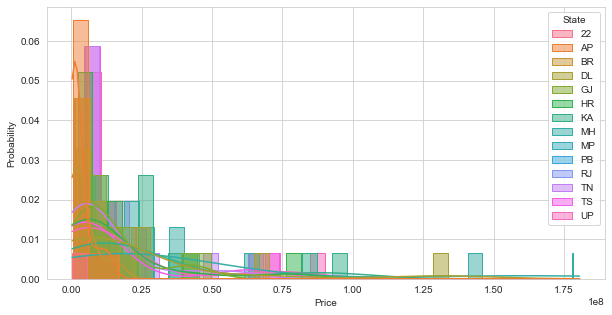

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(x='Price',data=B_state,hue='State',element='step',multiple='dodge',stat='probability',kde=True)


In [30]:
count_state=df.groupby(['Fuel_Type','State']).size().reset_index().rename(columns={0:'Total Counts'})
count_state

Fuel_Type State  Total Counts
0         Diesel    AP            14
1         Diesel    BR             8
2         Diesel    DL            57
3         Diesel    GJ            34
4         Diesel    HR            47
5         Diesel    KA           116
6         Diesel    MH           135
7         Diesel    TN            37
8         Diesel    TS            49
9         Diesel    UP            56
10        Petrol    22             1
11        Petrol    AP            50
12        Petrol    BR            67
13        Petrol    DL           448
14        Petrol    GJ           189
15        Petrol    HR           232
16        Petrol    KA           344
17        Petrol    MH           637
18        Petrol    MP             1
19        Petrol    PB             1
20        Petrol    RJ             1
21        Petrol    TN           267
22        Petrol    TS           218
23        Petrol    UP           274
24  Petrol + CNG    AP             1
25  Petrol + CNG    BR             2
26  Petrol + CNG    DL            35
27  Petrol + CNG    GJ            12
28  Petrol + CNG    HR            20
29  Petrol + CNG    KA             1
30  Petrol + CNG    MH            95
31  Petrol + CNG    TN             1
32  Petrol + CNG    TS             1
33  Petrol + CNG    UP            15

Text(0.5, 1.0, 'Fuel_Type Cars Density')

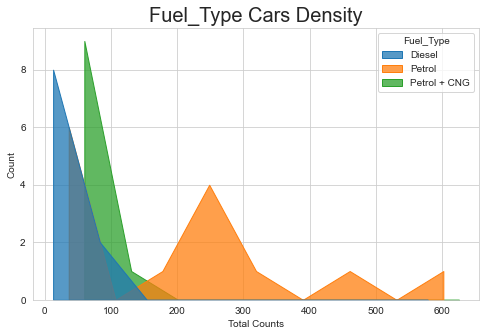

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(x='Total Counts',data=count_state,hue='Fuel_Type',element='poly',multiple='dodge')
plt.title("Fuel_Type Cars Density",fontsize=20)

In [32]:
state_count=df.groupby(['State','Make_Year'],sort='State',group_keys=['State']).size().reset_index().rename(columns={0:'Total Counts'})
state_count

State  Make_Year  Total Counts
0      22       2022             1
1      AP       2009             1
2      AP       2011             3
3      AP       2012             7
4      AP       2013            11
5      AP       2014            16
6      AP       2015             3
7      AP       2016             1
8      AP       2017             5
9      AP       2018             5
10     AP       2019             3
11     AP       2020             4
12     AP       2021             6
13     BR       2010             3
14     BR       2011             4
15     BR       2012             3
16     BR       2013             8
17     BR       2014             5
18     BR       2015             4
19     BR       2016             7
20     BR       2017            10
21     BR       2018            14
22     BR       2019             9
23     BR       2020             5
24     BR       2021             4
25     BR       2022             1
26     DL       2009             2
27     DL       2010             8
28     DL       2011            10
29     DL       2012             8
30     DL       2013             9
31     DL       2014            37
32     DL       2015            47
33     DL       2016            53
34     DL       2017            64
35     DL       2018            90
36     DL       2019            76
37     DL       2020            67
38     DL       2021            57
39     DL       2022            12
40     GJ       2012             2
41     GJ       2013             2
42     GJ       2014             6
43     GJ       2015             5
44     GJ       2016             8
45     GJ       2017            31
46     GJ       2018            29
47     GJ       2019            43
48     GJ       2020            50
49     GJ       2021            49
50     GJ       2022            10
51     HR       2010             2
52     HR       2011             6
53     HR       2012             5
54     HR       2013             6
55     HR       2014            15
56     HR       2015            12
57     HR       2016            16
58     HR       2017            26
59     HR       2018            42
60     HR       2019            52
61     HR       2020            54
62     HR       2021            50
63     HR       2022            13
64     KA       2009             1
65     KA       2010            16
66     KA       2011            16
67     KA       2012            22
68     KA       2013            19
69     KA       2014            29
70     KA       2015            43
71     KA       2016            51
72     KA       2017            36
73     KA       2018            52
74     KA       2019            71
75     KA       2020            54
76     KA       2021            44
77     KA       2022             7
78     MH       2010             2
79     MH       2011             6
80     MH       2012            23
81     MH       2013            28
82     MH       2014            64
83     MH       2015            51
84     MH       2016            98
85     MH       2017           129
86     MH       2018           151
87     MH       2019           128
88     MH       2020            91
89     MH       2021            77
90     MH       2022            19
91     MP       2018             1
92     PB       2018             1
93     RJ       2015             1
94     TN       2011             2
95     TN       2012             3
96     TN       2013             6
97     TN       2014             9
98     TN       2015            17
99     TN       2016            31
100    TN       2017            44
101    TN       2018            66
102    TN       2019            63
103    TN       2020            32
104    TN       2021            25
105    TN       2022             7
106    TS       2012             1
107    TS       2013             1
108    TS       2014            12
109    TS       2015            12
110    TS       2016            17
111    TS       2017            49
112    TS       2018            53
113    TS     

Text(0.5, 1.0, 'Vheicle Counts for sale as per Location')

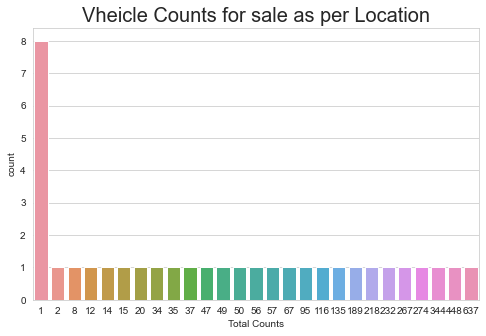

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='Total Counts',data=count_state)
plt.title("Vheicle Counts for sale as per Location",fontsize=20)

## Multi-Variate Analysis

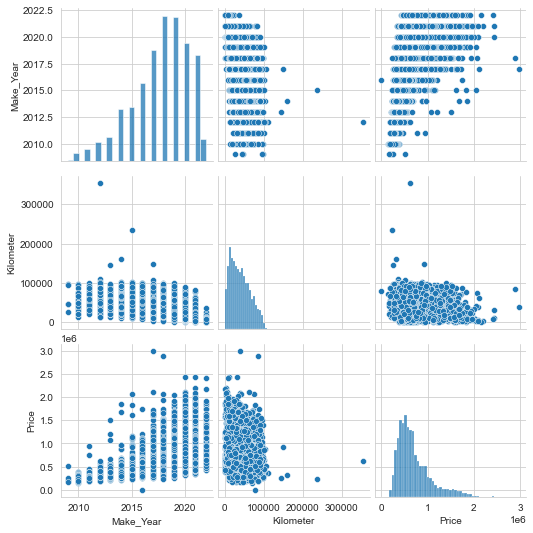

In [34]:
sns.pairplot(data=df)

### Feature Engneering

In [35]:
df['Period_Year']=[2022-i for i in df['Make_Year']]

## Label Encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [37]:
df.head()

Brand  Model  Varient  Make_Year  Kilometer  Fuel_Type  Owners   Price  \
0     11     14      249       2016      14808          1       1  525199   
1     11     14      249       2019      25641          1       0  663199   
2     11     14      249       2019      43970          1       0  639999   
3     11     14      249       2016      40552          1       0  507299   
4     11     14      255       2019      13397          1       0  619099   

   State  Period_Year  
0      3            6  
1      5            3  
2      3            3  
3      3            6  
4      3            3

## Descriptive Statisics

In [38]:
df.describe()

Brand        Model      Varient    Make_Year      Kilometer  \
count  3466.000000  3466.000000  3466.000000  3466.000000    3466.000000   
mean      9.837276    51.053664   390.694749  2017.713791   39703.454126   
std       3.961001    31.449834   208.645875     2.625663   25851.970238   
min       0.000000     0.000000     0.000000  2009.000000     188.000000   
25%       6.000000    24.000000   222.000000  2016.000000   18517.500000   
50%      11.000000    45.000000   403.000000  2018.000000   36283.500000   
75%      11.000000    81.000000   576.000000  2020.000000   57468.250000   
max      19.000000   108.000000   735.000000  2022.000000  353693.000000   

         Fuel_Type       Owners         Price        State  Period_Year  
count  3466.000000  3466.000000  3.466000e+03  3466.000000  3466.000000  
mean      0.893249     0.241200  7.029854e+05     6.979804     4.286209  
std       0.448342     0.465972  3.677890e+05     3.428873     2.625663  
min       0.000000     0.000000  0.000000e+00     0.000000     0.000000  
25%       1.000000     0.000000  4.450740e+05     4.000000     2.000000  
50%       1.000000     0.000000  6.072990e+05     7.000000     4.000000  
75%       1.000000     0.000000  8.592740e+05    11.000000     6.000000  
max       2.000000     2.000000  2.989899e+06    13.000000    13.000000

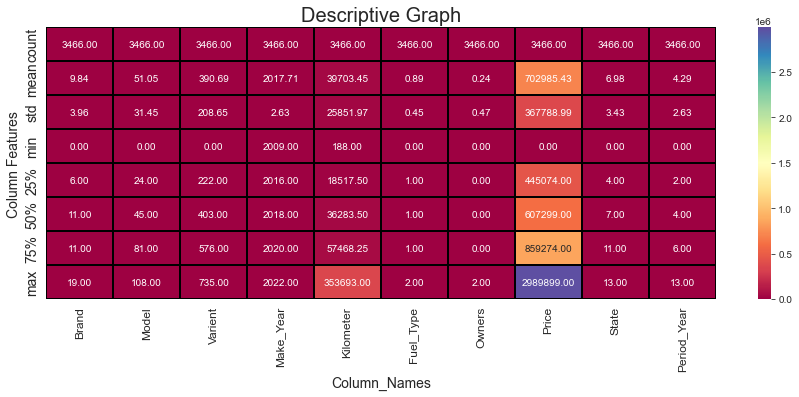

In [39]:
plt.figure(figsize=(15,5))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidth=0.02,fmt='0.2f',cmap='Spectral')
plt.title("Descriptive Graph",fontsize=20)
plt.xlabel("Column_Names",fontsize=14)
plt.ylabel("Column Features",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=90,fontsize=14)
plt.show()

## Observation:

- No Null values
- RIght Skewed Data ->Model,Kilometer,Price,State
- Left Skewed Data -> Varient
- Standard Deviation- Varient,kilometer,Price
- Huge Outliers- Kilometer

## Correlation Graph

In [40]:
df.corr()

Brand     Model   Varient  Make_Year  Kilometer  Fuel_Type  \
Brand        1.000000  0.115420  0.345535   0.161989  -0.096920   0.008254   
Model        0.115420  1.000000  0.101715  -0.072488   0.022087  -0.078906   
Varient      0.345535  0.101715  1.000000  -0.019940  -0.027204   0.016058   
Make_Year    0.161989 -0.072488 -0.019940   1.000000  -0.517828   0.026257   
Kilometer   -0.096920  0.022087 -0.027204  -0.517828   1.000000  -0.178679   
Fuel_Type    0.008254 -0.078906  0.016058   0.026257  -0.178679   1.000000   
Owners      -0.059725  0.038129 -0.008528  -0.255398   0.133820  -0.021766   
Price        0.033475  0.072631 -0.098789   0.486358  -0.184744  -0.364806   
State       -0.048711 -0.022663 -0.018331   0.125914   0.011298  -0.038761   
Period_Year -0.161989  0.072488  0.019940  -1.000000   0.517828  -0.026257   

               Owners     Price     State  Period_Year  
Brand       -0.059725  0.033475 -0.048711    -0.161989  
Model        0.038129  0.072631 -0.022663     0.072488  
Varient     -0.008528 -0.098789 -0.018331     0.019940  
Make_Year   -0.255398  0.486358  0.125914    -1.000000  
Kilometer    0.133820 -0.184744  0.011298     0.517828  
Fuel_Type   -0.021766 -0.364806 -0.038761    -0.026257  
Owners       1.000000 -0.146090 -0.022780     0.255398  
Price       -0.146090  1.000000  0.046474    -0.486358  
State       -0.022780  0.046474  1.000000    -0.125914  
Period_Year  0.255398 -0.486358 -0.125914     1.000000

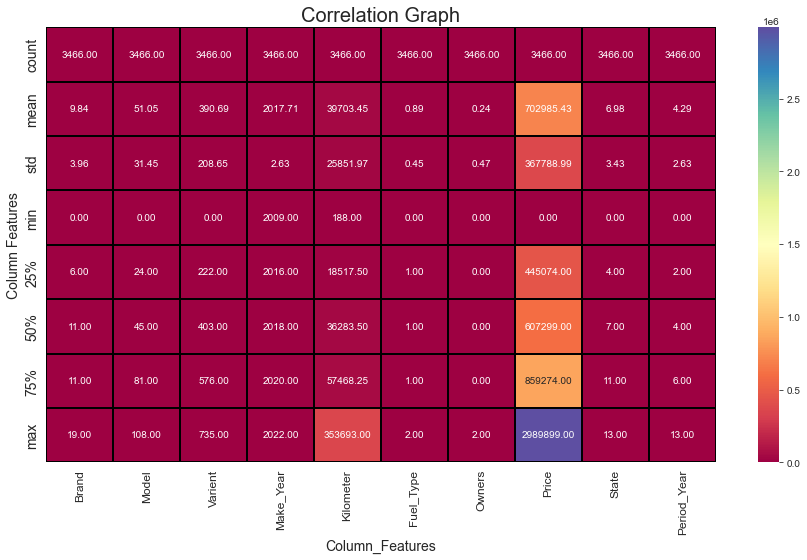

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidth=0.02,fmt='0.2f',cmap='Spectral')
plt.title("Correlation Graph",fontsize=20)
plt.xlabel("Column_Features",fontsize=14)
plt.ylabel("Column Features",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=90,fontsize=14)
plt.show()

In [42]:
df.corr()['Price'].sort_values()

Period_Year   -0.486358
Fuel_Type     -0.364806
Kilometer     -0.184744
Owners        -0.146090
Varient       -0.098789
Brand          0.033475
State          0.046474
Model          0.072631
Make_Year      0.486358
Price          1.000000
Name: Price, dtype: float64

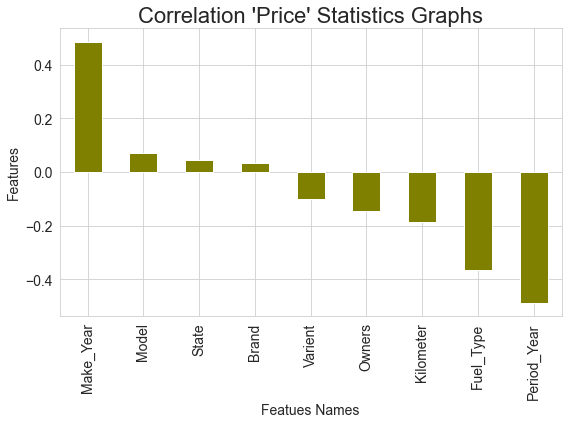

In [43]:
plt.figure(figsize=(8,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='olive')
plt.title("Correlation 'Price' Statistics Graphs",fontsize=22)
plt.xlabel("Featues Names",fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.tight_layout()

## Observation Shows:

- Period_Year is 47 percentage Negatively Correlated with the Target Variable
- Fuel_Type is 35 percentage Negatively Correlated with the Target Variable
- Kilometer is 17 percentage Negatively Correlated with the Target Variable.
- Owners is 13 percentage Negatively Correlated with the Target Variable.
- Variable is 10 percentage Negatively Correlated with the Target Variable.
- State is 1 percentage Positively correlated with the Target Variable.
- Brand is 5 percentage Positively correlated with the Target Variable
- Model is 6 percentage Positively Correlated with the Target Variable
- Price is 100 percentage correlated to OWn.

NOTE:

- Period_Year Worse Correlated
- Model is Positively Correlated with the Target Variable.

## Checking Outliers

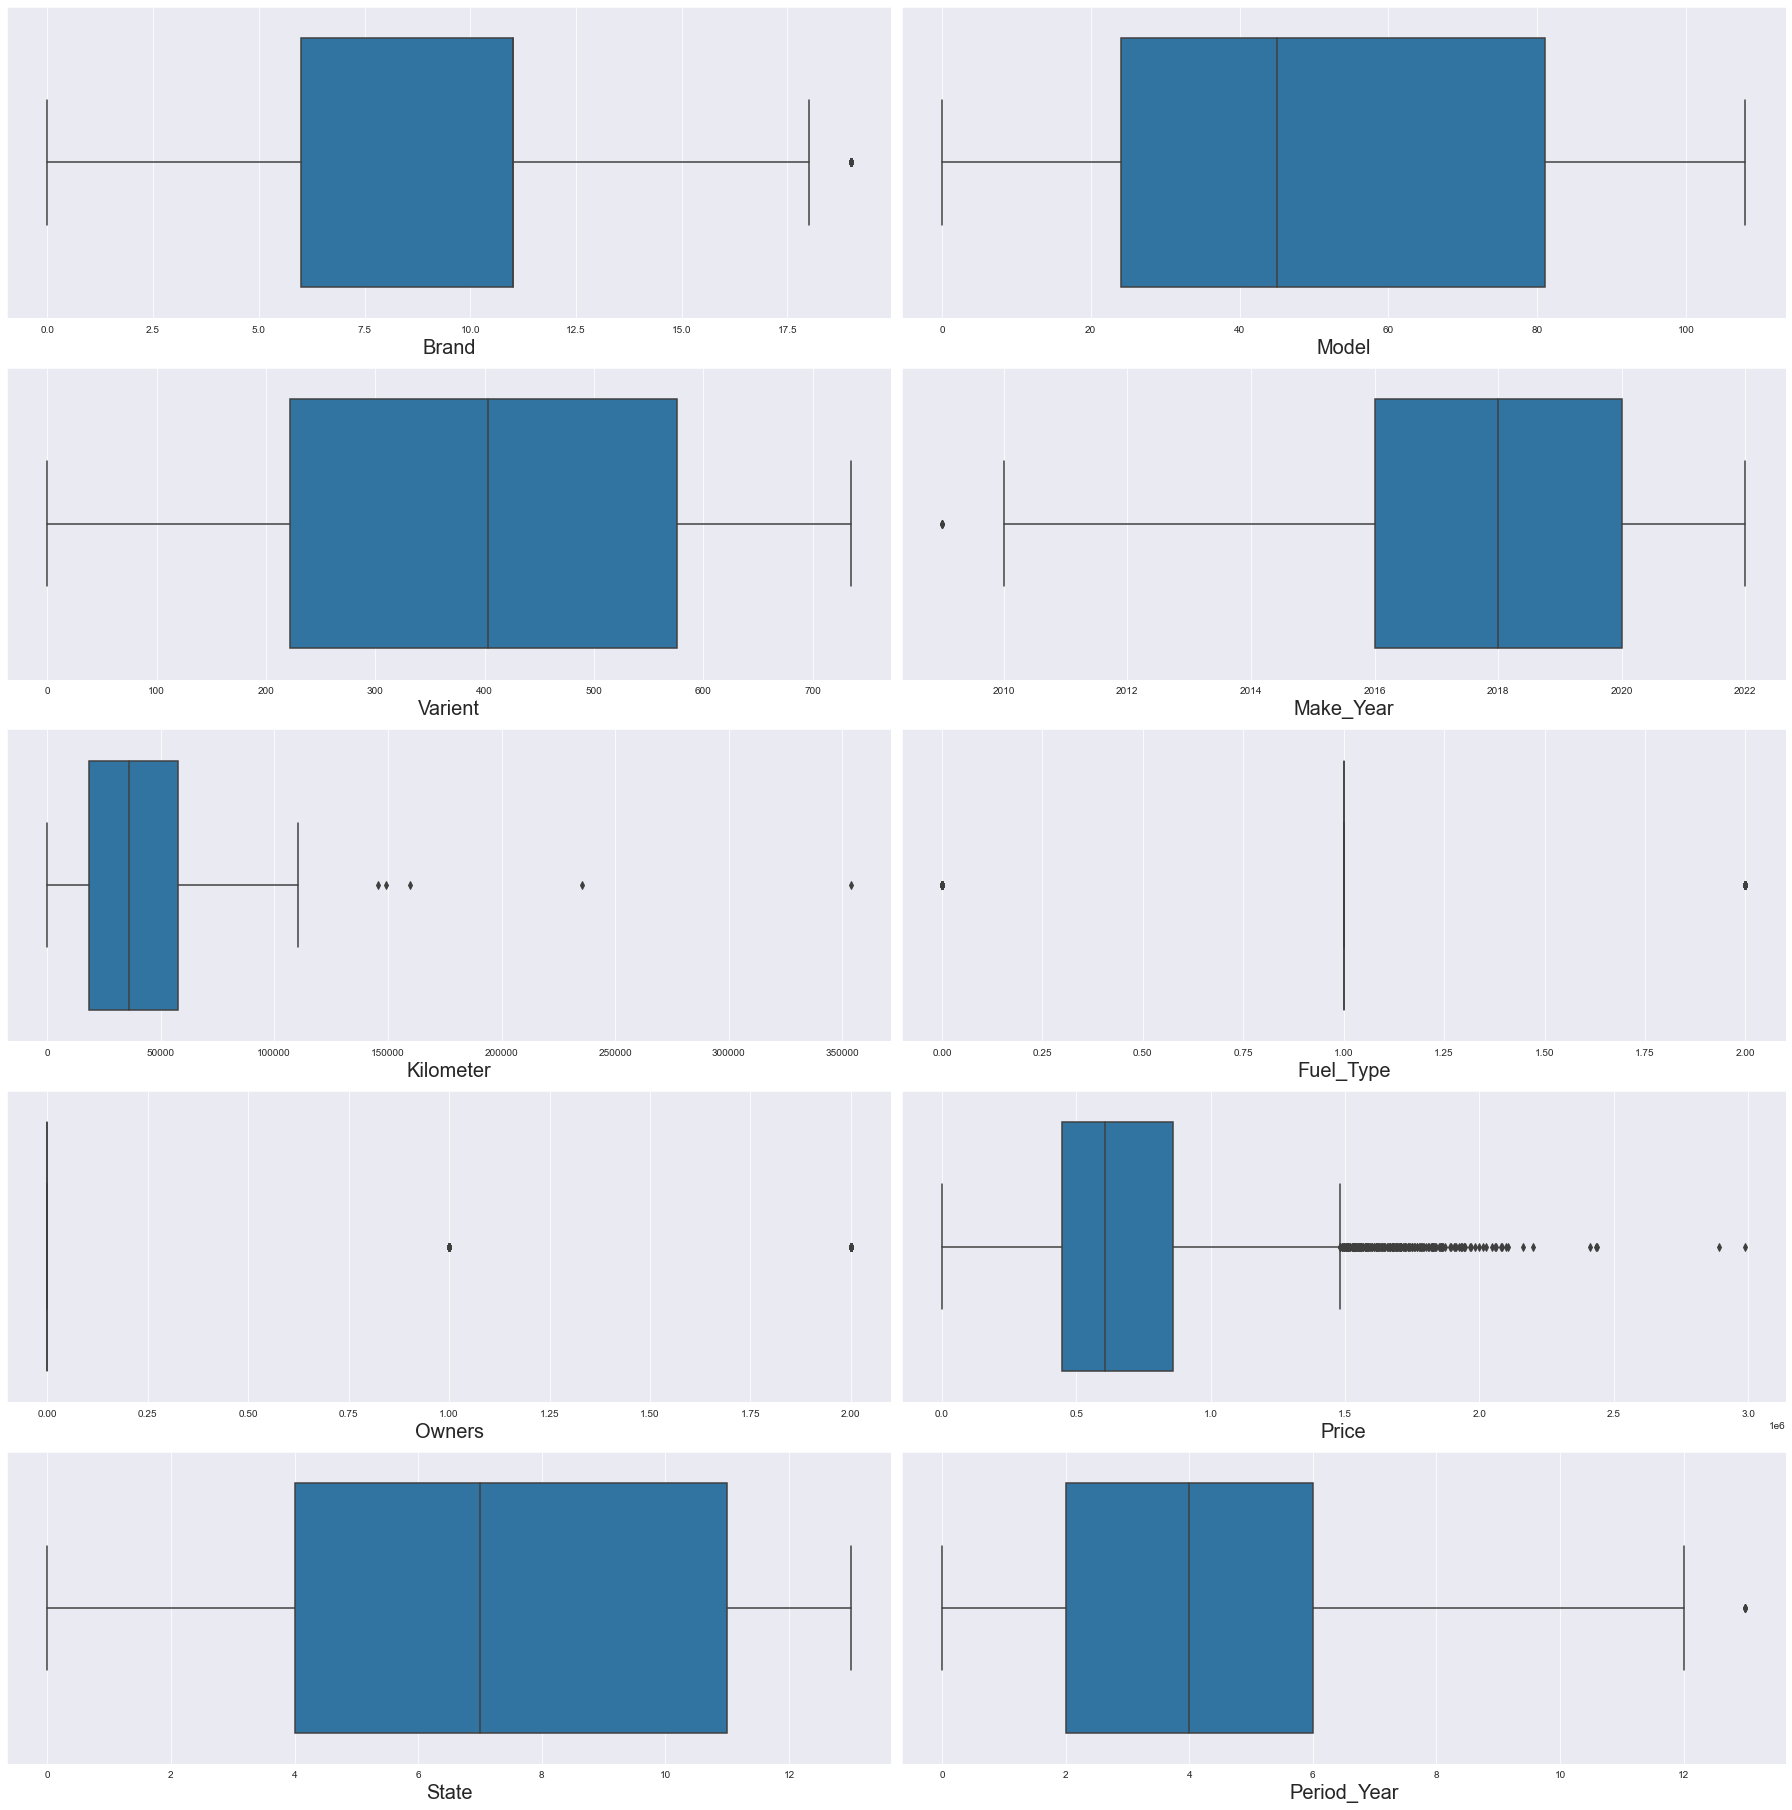

In [44]:
plt.figure(figsize=(25,100),facecolor='white',edgecolor='black')
plotnumb=1

for i in df.columns:
    if plotnumb<=20:
        sns.set_style("darkgrid")
        ax=plt.subplot(20,2,plotnumb)
        sns.boxplot(x=i,data=df)
        plt.xlabel(i,fontsize=20)
        
    plotnumb+=1
plt.tight_layout()

## Observation :

- Huge Outliers : Price
- Less Outliers : Period_Year, Kilometer, Brand

Note: Price is a target Variable

## Skewness

In [45]:
df.skew().sort_values()

Make_Year     -0.724594
Fuel_Type     -0.457322
Varient       -0.243823
Model          0.234306
Brand          0.381576
State          0.446098
Period_Year    0.724594
Kilometer      1.116372
Price          1.451915
Owners         1.703767
dtype: float64

## Skewness Above +/- 65 is considered very high

columns shows skewness are:

- Fuel_Type
- Period_Year
- Price
- Owners
- Kilometer

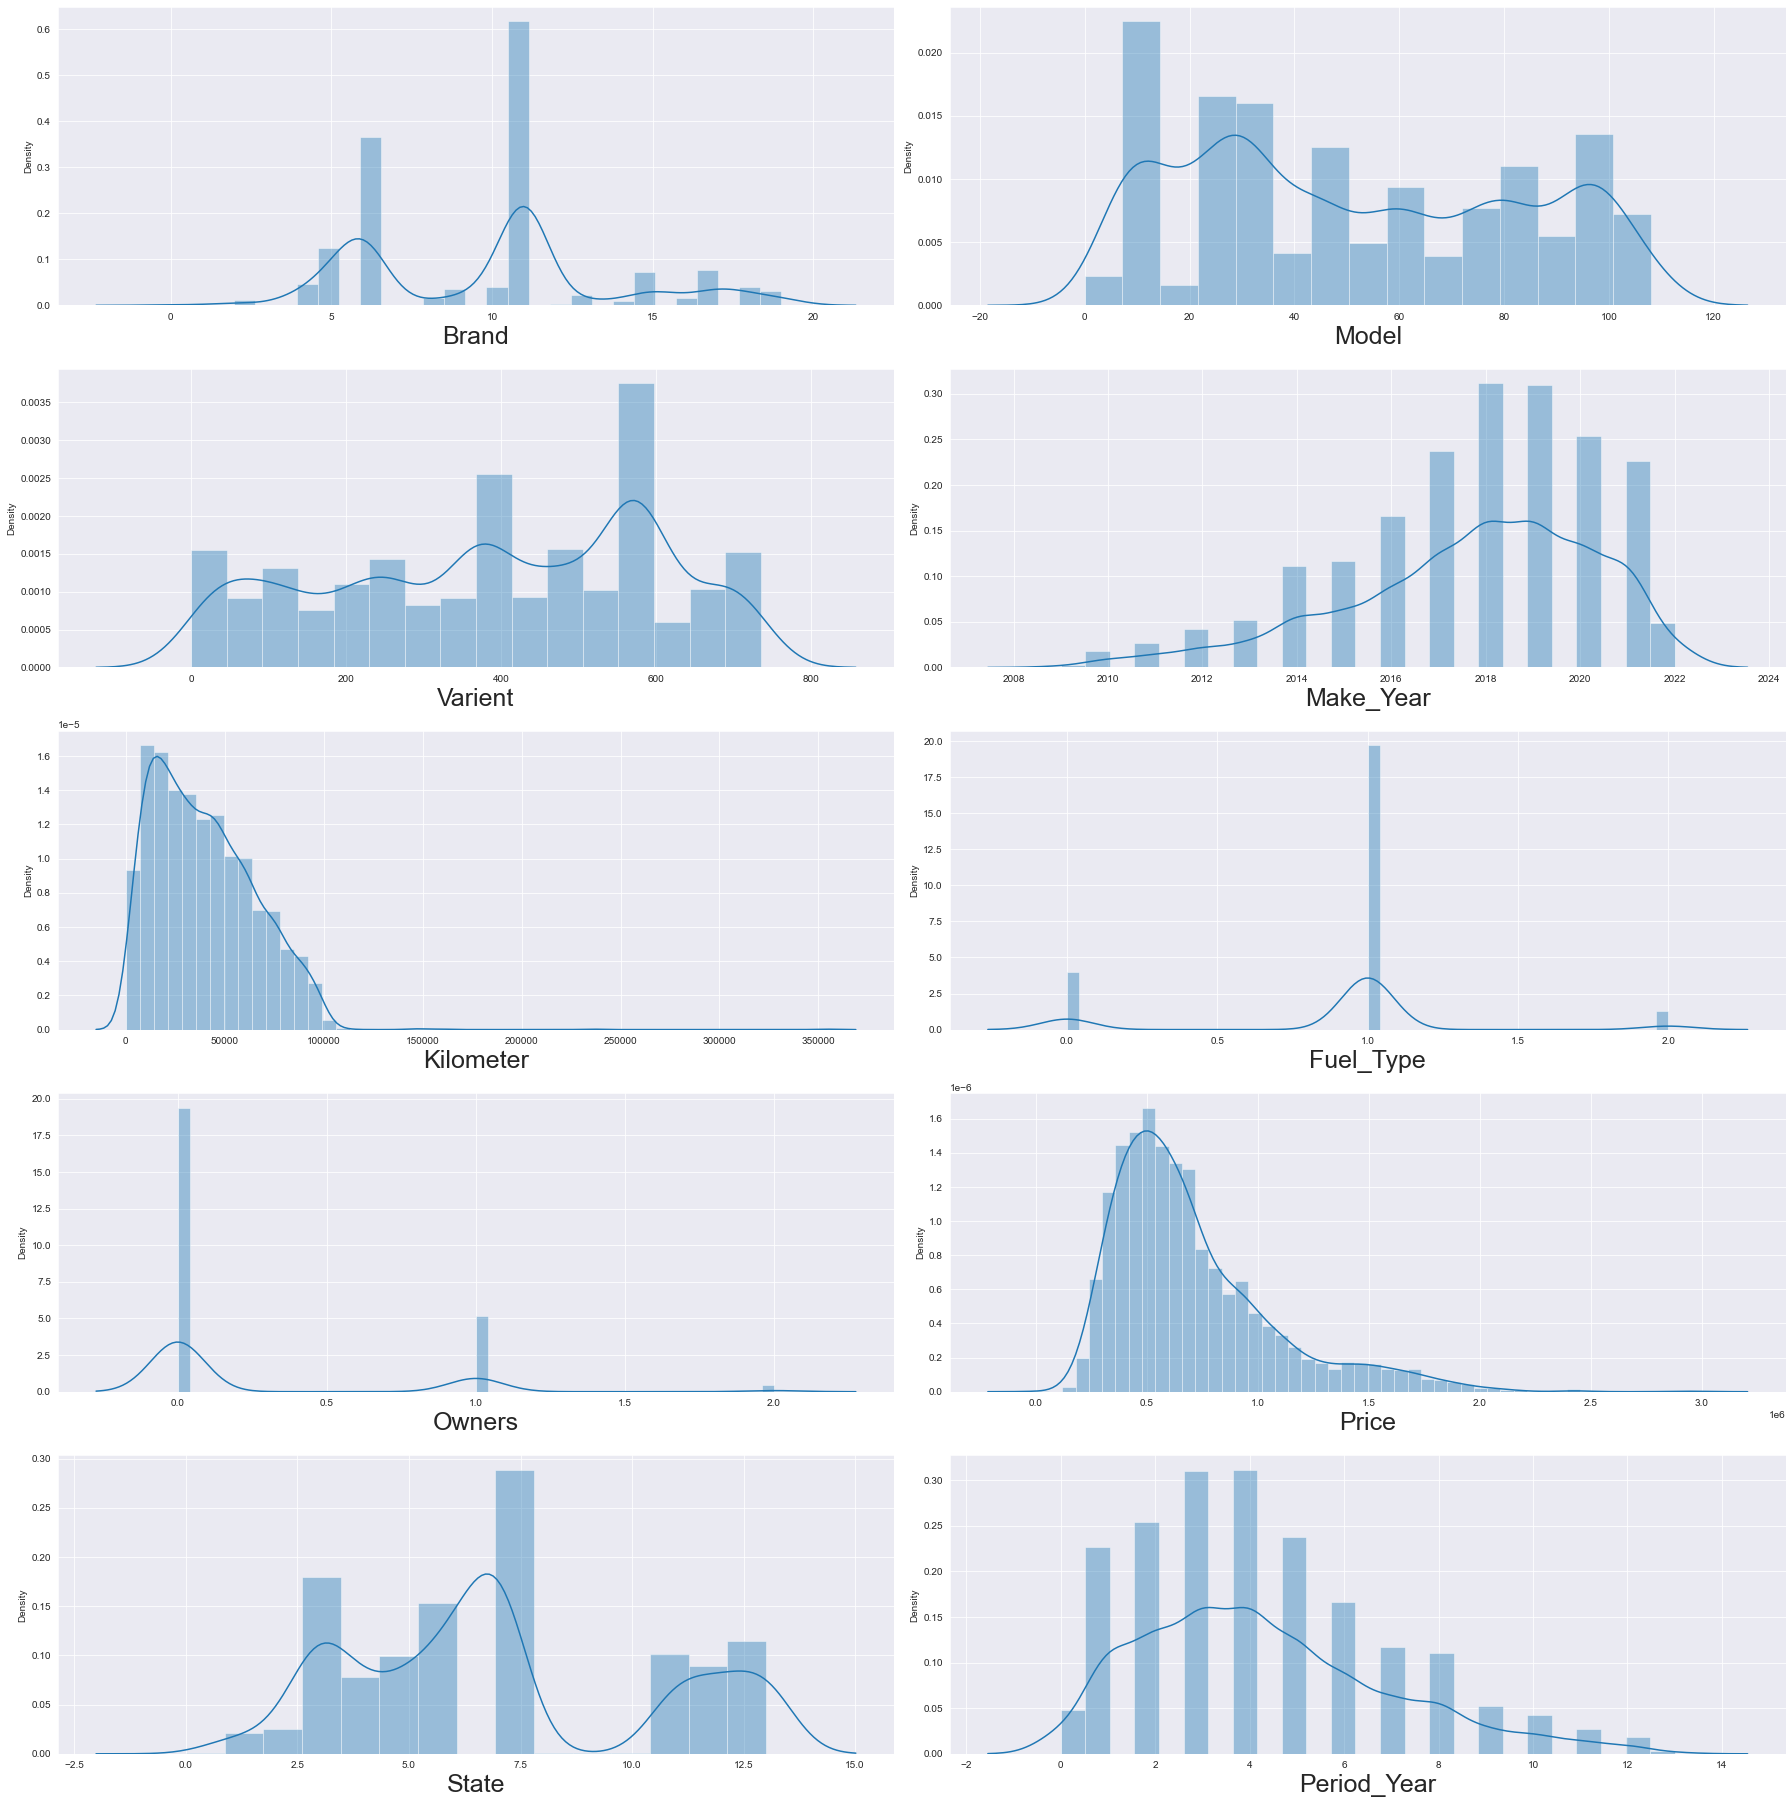

In [46]:
plt.figure(figsize=(25,100))
plotnumb=1

for i in df.columns:
    if plotnumb<=20:
        sns.set_style("darkgrid")
        ax=plt.subplot(20,2,plotnumb)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=25)
        
    plotnumb+=1
plt.tight_layout()

## Graph Observation

- Brand graph shows its is not norlised as the graph lies beyond the Normal curve (Multi-Modal)
- Model graph shows is not normalised. as the building blocks are beyond the normal curve.
- Varient graph Shows that it is not normalised as the building blocks are beyond the normal curve.
- Kilometer graph Shows that it is not normalised as the building blocks are beyond the normal graph.
- Fuel_Type Shows Graph data has three modes.
- Owners Shows Graph data has 3 modes.
- Price graph Shows data not normalised.
- State and Period_Year shows data is not normalised.

## Data Cleansing:

In [47]:
df.corr()['Price'].sort_values()

Period_Year   -0.486358
Fuel_Type     -0.364806
Kilometer     -0.184744
Owners        -0.146090
Varient       -0.098789
Brand          0.033475
State          0.046474
Model          0.072631
Make_Year      0.486358
Price          1.000000
Name: Price, dtype: float64

In [48]:
delete=pd.DataFrame(data={'Column':['Period_Year'],'Values':[-0.471042],'Outliers':['Yes'],'Normalised':['Yes']})
delete

Column    Values Outliers Normalised
0  Period_Year -0.471042      Yes        Yes

In [49]:
df.drop(['Period_Year'],axis=1,inplace=True)

## Removing Outliers

In [50]:
z=np.abs(zscore(df))
z.head(3)

Brand     Model   Varient  Make_Year  Kilometer  Fuel_Type    Owners  \
0  0.293585  1.178353  0.679214   0.652802   0.963139   0.238137  1.628657   
1  0.293585  1.178353  0.679214   0.489931   0.544039   0.238137  0.517702   
2  0.293585  1.178353  0.679214   0.489931   0.165061   0.238137  0.517702   

      Price     State  
0  0.483462  1.160842  
1  0.108193  0.577475  
2  0.171282  1.160842

In [51]:
np.where(z>3)

(array([  63,   94,  111,  123,  145,  194,  197,  311,  327,  391,  420,
         426,  437,  440,  459,  468,  479,  490,  491,  506,  512,  530,
         532,  576,  589,  599,  607,  609,  615,  629,  663,  676,  751,
         769,  810,  823,  876,  911, 1055, 1088, 1124, 1126, 1131, 1159,
        1163, 1177, 1208, 1215, 1253, 1303, 1315, 1356, 1372, 1376, 1385,
        1505, 1552, 1590, 1681, 1694, 1702, 1803, 1869, 1886, 1917, 1921,
        1964, 1980, 1986, 2018, 2029, 2055, 2071, 2101, 2108, 2122, 2135,
        2140, 2147, 2246, 2252, 2276, 2287, 2314, 2337, 2344, 2347, 2370,
        2399, 2425, 2450, 2472, 2491, 2503, 2535, 2564, 2584, 2615, 2657,
        2661, 2667, 2689, 2717, 2726, 2792, 2853, 2868, 2894, 2990, 3065,
        3086, 3105, 3142, 3153, 3253, 3276, 3324, 3390, 3410, 3453],
       dtype=int64),
 array([3, 6, 4, 7, 6, 6, 3, 6, 7, 7, 7, 6, 3, 7, 6, 7, 7, 7, 6, 6, 7, 7,
        6, 7, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 7, 4, 7, 7, 7, 6, 7, 7, 7,
        6, 7, 7, 7, 6,

In [52]:
z.iloc[15,5]

0.2381366582089928

In [53]:
#replacing new_df

new_df=df[(z<3).all(axis=1)]

## Data Loss Percentage

In [54]:
print("Old Data Frame ",df.shape[0],"New Data Frame ",new_df.shape[0]," Total_Dropped ",df.shape[0]-new_df.shape[0])

Old Data Frame  3466 New Data Frame  3346  Total_Dropped  120


In [55]:
print("Data Loss Percentage",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data Loss Percentage 3.4622042700519327


- The Data Loss is not more than 5 percentage, so we will go with the New Data Frame

## Dividing The Data For Train and Test

In [56]:
# Shape of x
x=new_df.drop(['Price'],axis=1)

In [57]:
# Shaped for y
y=new_df.iloc[:,-2]

In [58]:
print("SHAPE OF X IS ",x.shape," SHAPE OF Y IS ", y.shape)

SHAPE OF X IS  (3346, 8)  SHAPE OF Y IS  (3346,)


In [59]:
x.columns

Index(['Brand', 'Model', 'Varient', 'Make_Year', 'Kilometer', 'Fuel_Type',
       'Owners', 'State'],
      dtype='object')

## Using Standard Scaler

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x=ss.fit_transform(x)
x

array([[ 0.29485192, -1.17956803, -0.68594302, ...,  0.22979817,
         1.92510982, -1.16379625],
       [ 0.29485192, -1.17956803, -0.68594302, ...,  0.22979817,
        -0.51945089, -0.58028501],
       [ 0.29485192, -1.17956803, -0.68594302, ...,  0.22979817,
        -0.51945089, -1.16379625],
       ...,
       [ 0.29485192, -1.17956803, -0.90606513, ...,  0.22979817,
        -0.51945089, -0.58028501],
       [ 0.29485192, -1.37048847,  0.87883804, ...,  0.22979817,
        -0.51945089,  1.75375995],
       [ 0.29485192, -1.59322898,  0.87883804, ...,  0.22979817,
        -0.51945089, -0.58028501]])

In [61]:
x=pd.DataFrame(data=x,columns=['Brand', 'Model', 'Varient', 'Make_Year', 'Kilometer', 'Fuel_Type',
       'Owners', 'State'])

In [62]:
print(" Mean Value ",round(x.mean(),2)," Standard Deviation ",round(x.std(),2))


 Mean Value  Brand       -0.0
Model        0.0
Varient     -0.0
Make_Year   -0.0
Kilometer    0.0
Fuel_Type    0.0
Owners       0.0
State       -0.0
dtype: float64  Standard Deviation  Brand        1.0
Model        1.0
Varient      1.0
Make_Year    1.0
Kilometer    1.0
Fuel_Type    1.0
Owners       1.0
State        1.0
dtype: float64


## Removing Skewness

In [63]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x

array([[ 0.36611842, -1.23655894, -0.73575446, ...,  0.16158373,
         1.92510982, -1.29182374],
       [ 0.36611842, -1.23655894, -0.73575446, ...,  0.16158373,
        -0.51945089, -0.50589601],
       [ 0.36611842, -1.23655894, -0.73575446, ...,  0.16158373,
        -0.51945089, -1.29182374],
       ...,
       [ 0.36611842, -1.23655894, -0.92767581, ...,  0.16158373,
        -0.51945089, -0.50589601],
       [ 0.36611842, -1.47326045,  0.87629003, ...,  0.16158373,
        -0.51945089,  1.55744557],
       [ 0.36611842, -1.75554974,  0.87629003, ...,  0.16158373,
        -0.51945089, -0.50589601]])

In [64]:
x=pd.DataFrame(data=x,columns=['Brand', 'Model', 'Varient', 'Make_Year', 'Kilometer', 'Fuel_Type',
       'Owners', 'State'])

In [65]:
x.skew()

Brand        0.087179
Model        0.053177
Varient     -0.041740
Make_Year   -0.044803
Kilometer    0.076566
Fuel_Type    0.405503
Owners       1.406289
State        0.019036
dtype: float64

In [66]:
x.drop(['Owners'],axis=1,inplace=True)

In [67]:
x.skew()

Brand        0.087179
Model        0.053177
Varient     -0.041740
Make_Year   -0.044803
Kilometer    0.076566
Fuel_Type    0.405503
State        0.019036
dtype: float64

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variable']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif
calc_vif(x)

Variable  VIF Factors
0      Brand     1.202960
1      Model     1.024206
2    Varient     1.158028
3  Make_Year     1.573487
4  Kilometer     1.551118
5  Fuel_Type     1.031131
6      State     1.025339

## Observation Shows:

- Vif shows Normalised

## Target Variable:

In [69]:
# Target Values

y.unique()

array([525199, 663199, 639999, ..., 743799, 785899, 422999], dtype=int64)

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [71]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    print(f"Random State {i},The Train accuracy {round(r2_score(y_train,pred_train),2)},Test Accuracy {round(r2_score(y_test,pred_test),2)}")

Random State 1,The Train accuracy 0.4, Test Accuracy 0.39
Random State 2,The Train accuracy 0.4, Test Accuracy 0.41
Random State 3,The Train accuracy 0.39, Test Accuracy 0.42
Random State 4,The Train accuracy 0.39, Test Accuracy 0.43
Random State 5,The Train accuracy 0.4, Test Accuracy 0.39
Random State 6,The Train accuracy 0.4, Test Accuracy 0.38
Random State 7,The Train accuracy 0.39, Test Accuracy 0.43
Random State 8,The Train accuracy 0.4, Test Accuracy 0.41
Random State 9,The Train accuracy 0.4, Test Accuracy 0.4
Random State 10,The Train accuracy 0.41, Test Accuracy 0.35
Random State 11,The Train accuracy 0.4, Test Accuracy 0.39
Random State 12,The Train accuracy 0.4, Test Accuracy 0.41
Random State 13,The Train accuracy 0.4, Test Accuracy 0.4
Random State 14,The Train accuracy 0.39, Test Accuracy 0.43
Random State 15,The Train accuracy 0.41, Test Accuracy 0.36
Random State 16,The Train accuracy 0.39, Test Accuracy 0.42
Random State 17,The Train accuracy 0.41, Test Accuracy 0.36


In [73]:
# Train Test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98,test_size=0.3)

#training 
lr.fit(x_train,y_train)
lr_score=lr.score(x_train,y_train)

#predict
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train)*100,"Testing Accuracy R2_score ",r2_score(y_test,pred_test)*100)
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  40.70331231275263 Testing Accuracy R2_score  37.87184960914324
Training Mean_squared_Error  66490715295.26908 Testing Mean_squared_error  67144666395.462364
Training Absolute_Error  191916.54602497 Testing Absolute Error 191946.90620835096


In [74]:
print("Coefficient ",lr.coef_," Intercept ",lr.intercept_)

Coefficient  [ -23522.91865958   27770.49990951  -25818.03549682  198805.56416303
   31679.75411574 -116796.97234822   -4892.11956454]  Intercept  691567.5234142125


## Model Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=lr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score {test_accuracy}")

At CROSS_FOLD 2, Cross_Val_Mean 0.307935920776955 ,Training Score is 0.40703312312752626, Testing Score 0.3787184960914324
At CROSS_FOLD 3, Cross_Val_Mean 0.3856304370458137 ,Training Score is 0.40703312312752626, Testing Score 0.3787184960914324
At CROSS_FOLD 4, Cross_Val_Mean 0.3742574841841261 ,Training Score is 0.40703312312752626, Testing Score 0.3787184960914324
At CROSS_FOLD 5, Cross_Val_Mean 0.3712233732495198 ,Training Score is 0.40703312312752626, Testing Score 0.3787184960914324
At CROSS_FOLD 6, Cross_Val_Mean 0.3608307093398237 ,Training Score is 0.40703312312752626, Testing Score 0.3787184960914324
At CROSS_FOLD 7, Cross_Val_Mean 0.36911570638276475 ,Training Score is 0.40703312312752626, Testing Score 0.3787184960914324
At CROSS_FOLD 8, Cross_Val_Mean 0.36481018582505664 ,Training Score is 0.40703312312752626, Testing Score 0.3787184960914324
At CROSS_FOLD 9, Cross_Val_Mean 0.3642549204292206 ,Training Score is 0.40703312312752626, Testing Score 0.3787184960914324


In [76]:
# pred training for linear regression
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with linear regression
lr_cv_score=cross_val_score(lr,x,y,cv=2) 
lr_mean=lr_cv_score.mean() #mean value

print("Cv_score of Model is ",lr_mean,"The Training Score is ", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.307935920776955 The Training Score is  0.40703312312752626 Testing Score Stands  0.3787184960914324


## Model Graph

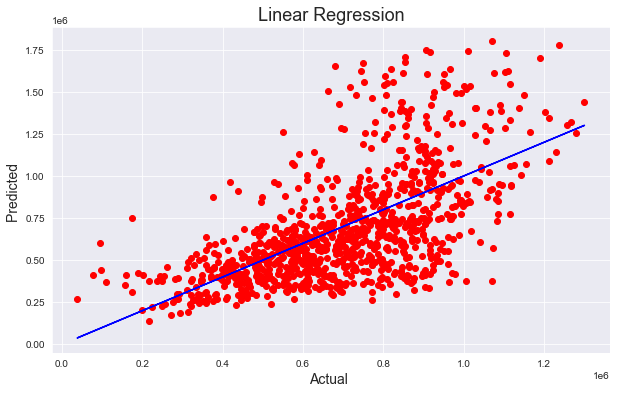

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization

In [78]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet()
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

34.985736603735305

In [79]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=2)
en_cv_mean=en_cv_score.mean()
en_cv_mean*100

32.49123994789796

## Models:

In [80]:
#models
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()
svm=SVR()

# Ensamble models
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
bg=BaggingRegressor()

# Bagging Regressor
ada=AdaBoostRegressor()
et=ExtraTreesRegressor()
sgd=SGDRegressor()

#neural networks
mlp=MLPRegressor()

************************************************** 

Model DecisionTreeRegressor() 
 **************************************************
Training Accuracy r2_score  0.9999999378364614 Testing Accuracy R2_score  0.7832883299634129
Training Mean_squared_Error  6970.5380017079415 Testing Mean_squared_error  23420997884.320717
Training Absolute_Error  3.373185311699402 Testing Absolute Error 90504.07768924303

 DecisionTreeRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.73 Train Score1.0 Testing Score0.78
CROSS_FOLD 3, CV_Score0.75 Train Score1.0 Testing Score0.78
CROSS_FOLD 4, CV_Score0.79 Train Score1.0 Testing Score0.78
CROSS_FOLD 5, CV_Score0.8 Train Score1.0 Testing Score0.78
CROSS_FOLD 6, CV_Score0.8 Train Score1.0 Testing Score0.78
CROSS_FOLD 7, CV_Score0.81 Train Score1.0 Testing Score0.78
CROSS_FOLD 8, CV_Score0.8 Train Score1.0 Testing Score0.78
CROSS_FOLD 9, CV_Score0.8 Train Score1.0 Testing Score0.78

Model Graph


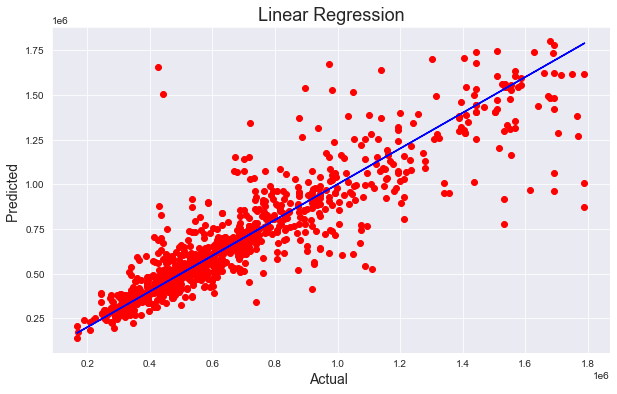

************************************************** 

Model KNeighborsRegressor() 
 **************************************************
Training Accuracy r2_score  0.7808582820422624 Testing Accuracy R2_score  0.5989907977862503
Training Mean_squared_Error  24572855831.166046 Testing Mean_squared_error  43338855148.205574
Training Absolute_Error  105387.72245943638 Testing Absolute Error 135690.06334661355

 KNeighborsRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.55 Train Score0.78 Testing Score0.6
CROSS_FOLD 3, CV_Score0.58 Train Score0.78 Testing Score0.6
CROSS_FOLD 4, CV_Score0.59 Train Score0.78 Testing Score0.6
CROSS_FOLD 5, CV_Score0.61 Train Score0.78 Testing Score0.6
CROSS_FOLD 6, CV_Score0.6 Train Score0.78 Testing Score0.6
CROSS_FOLD 7, CV_Score0.61 Train Score0.78 Testing Score0.6
CROSS_FOLD 8, CV_Score0.62 Train Score0.78 Testing Score0.6
CROSS_FOLD 9, CV_Score0.62 Train Score0.78 Testing Score0.6

Model Graph


************************************************** 

Model SVR() 
 **************************************************
Training Accuracy r2_score  -0.05900776536876551 Testing Accuracy R2_score  -0.05608581913386734
Training Mean_squared_Error  118748932813.92734 Testing Mean_squared_error  114135910315.3952
Training Absolute_Error  249511.57119802377 Testing Absolute Error 244828.54004801702

 SVR() Model Cross Validation 

CROSS_FOLD 2, CV_Score-0.06 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 3, CV_Score-0.06 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 4, CV_Score-0.06 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 5, CV_Score-0.07 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 6, CV_Score-0.08 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 7, CV_Score-0.09 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 8, CV_Score-0.09 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 9, CV_Score-0.08 Train Score-0.06 Testing Score-0.06

Model Graph


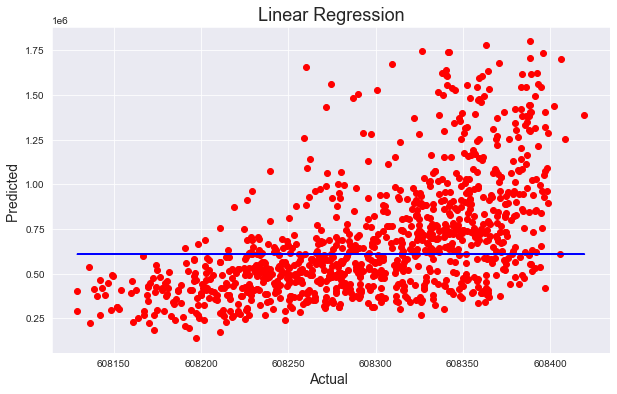

************************************************** 

Model RandomForestRegressor() 
 **************************************************
Training Accuracy r2_score  0.9833115573478878 Testing Accuracy R2_score  0.8644198549569428
Training Mean_squared_Error  1871312770.3786688 Testing Mean_squared_error  14652751693.866951
Training Absolute_Error  26225.076404782238 Testing Absolute Error 70554.41895750331

 RandomForestRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.83 Train Score0.98 Testing Score0.86
CROSS_FOLD 3, CV_Score0.87 Train Score0.98 Testing Score0.86
CROSS_FOLD 4, CV_Score0.87 Train Score0.98 Testing Score0.86
CROSS_FOLD 5, CV_Score0.88 Train Score0.98 Testing Score0.86
CROSS_FOLD 6, CV_Score0.88 Train Score0.98 Testing Score0.86
CROSS_FOLD 7, CV_Score0.88 Train Score0.98 Testing Score0.86
CROSS_FOLD 8, CV_Score0.88 Train Score0.98 Testing Score0.86
CROSS_FOLD 9, CV_Score0.89 Train Score0.98 Testing Score0.86

Model Graph


************************************************** 

Model GradientBoostingRegressor() 
 **************************************************
Training Accuracy r2_score  0.8618366203052028 Testing Accuracy R2_score  0.8285445257743425
Training Mean_squared_Error  15492571848.14833 Testing Mean_squared_error  18529958716.188995
Training Absolute_Error  88021.12303273664 Testing Absolute Error 94037.32426145411

 GradientBoostingRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.79 Train Score0.86 Testing Score0.83
CROSS_FOLD 3, CV_Score0.81 Train Score0.86 Testing Score0.83
CROSS_FOLD 4, CV_Score0.81 Train Score0.86 Testing Score0.83
CROSS_FOLD 5, CV_Score0.81 Train Score0.86 Testing Score0.83
CROSS_FOLD 6, CV_Score0.81 Train Score0.86 Testing Score0.83
CROSS_FOLD 7, CV_Score0.81 Train Score0.86 Testing Score0.83
CROSS_FOLD 8, CV_Score0.81 Train Score0.86 Testing Score0.83
CROSS_FOLD 9, CV_Score0.81 Train Score0.86 Testing Score0.83

Model Graph


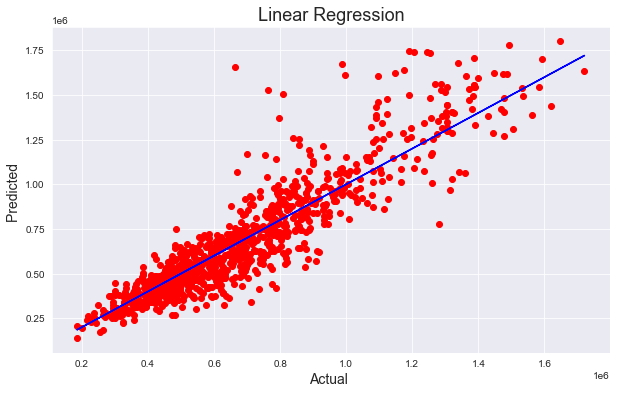

************************************************** 

Model BaggingRegressor() 
 **************************************************
Training Accuracy r2_score  0.9795135641312641 Testing Accuracy R2_score  0.8569302784943914
Training Mean_squared_Error  2297190328.6528063 Testing Mean_squared_error  15462183666.101128
Training Absolute_Error  28954.362951892967 Testing Absolute Error 74362.71663346613

 BaggingRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.82 Train Score0.98 Testing Score0.86
CROSS_FOLD 3, CV_Score0.85 Train Score0.98 Testing Score0.86
CROSS_FOLD 4, CV_Score0.85 Train Score0.98 Testing Score0.86
CROSS_FOLD 5, CV_Score0.86 Train Score0.98 Testing Score0.86
CROSS_FOLD 6, CV_Score0.87 Train Score0.98 Testing Score0.86
CROSS_FOLD 7, CV_Score0.86 Train Score0.98 Testing Score0.86
CROSS_FOLD 8, CV_Score0.87 Train Score0.98 Testing Score0.86
CROSS_FOLD 9, CV_Score0.87 Train Score0.98 Testing Score0.86

Model Graph


************************************************** 

Model AdaBoostRegressor() 
 **************************************************
Training Accuracy r2_score  0.5476654766266038 Testing Accuracy R2_score  0.5036204315396839
Training Mean_squared_Error  50721291837.537186 Testing Mean_squared_error  53645956494.94254
Training Absolute_Error  185369.98061845652 Testing Absolute Error 185018.97872408442

 AdaBoostRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.43 Train Score0.55 Testing Score0.5
CROSS_FOLD 3, CV_Score0.45 Train Score0.55 Testing Score0.5
CROSS_FOLD 4, CV_Score0.44 Train Score0.55 Testing Score0.5
CROSS_FOLD 5, CV_Score0.43 Train Score0.55 Testing Score0.5
CROSS_FOLD 6, CV_Score0.47 Train Score0.55 Testing Score0.5
CROSS_FOLD 7, CV_Score0.45 Train Score0.55 Testing Score0.5
CROSS_FOLD 8, CV_Score0.45 Train Score0.55 Testing Score0.5
CROSS_FOLD 9, CV_Score0.44 Train Score0.55 Testing Score0.5

Model Graph


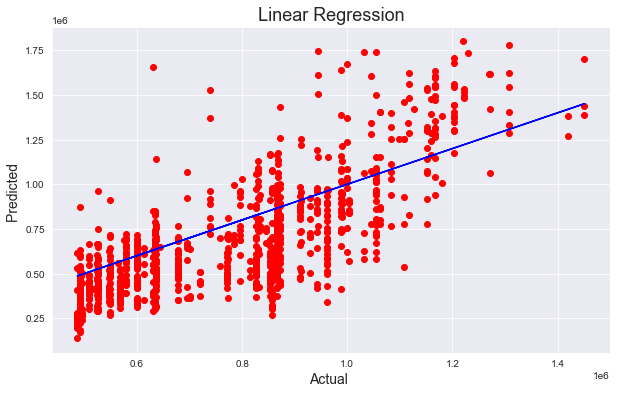

************************************************** 

Model ExtraTreesRegressor() 
 **************************************************
Training Accuracy r2_score  0.9999999378364614 Testing Accuracy R2_score  0.8589513085898535
Training Mean_squared_Error  6970.5380017079415 Testing Mean_squared_error  15243761918.984436
Training Absolute_Error  3.373185311699402 Testing Absolute Error 73471.1143625498

 ExtraTreesRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.8 Train Score1.0 Testing Score0.86
CROSS_FOLD 3, CV_Score0.86 Train Score1.0 Testing Score0.86
CROSS_FOLD 4, CV_Score0.86 Train Score1.0 Testing Score0.86
CROSS_FOLD 5, CV_Score0.87 Train Score1.0 Testing Score0.86
CROSS_FOLD 6, CV_Score0.88 Train Score1.0 Testing Score0.86
CROSS_FOLD 7, CV_Score0.88 Train Score1.0 Testing Score0.86
CROSS_FOLD 8, CV_Score0.88 Train Score1.0 Testing Score0.86
CROSS_FOLD 9, CV_Score0.88 Train Score1.0 Testing Score0.86

Model Graph


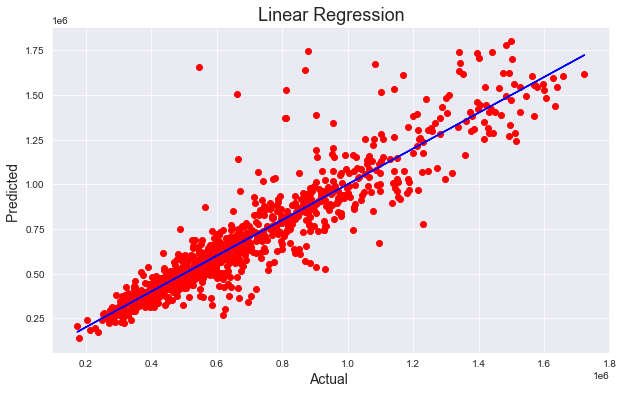

************************************************** 

Model SGDRegressor() 
 **************************************************
Training Accuracy r2_score  0.40698524327772045 Testing Accuracy R2_score  0.37916466022621886
Training Mean_squared_Error  66496084170.97865 Testing Mean_squared_error  67096447445.11636
Training Absolute_Error  191960.86528156212 Testing Absolute Error 191831.1509022541

 SGDRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.31 Train Score0.41 Testing Score0.38
CROSS_FOLD 3, CV_Score0.38 Train Score0.41 Testing Score0.38
CROSS_FOLD 4, CV_Score0.37 Train Score0.41 Testing Score0.38
CROSS_FOLD 5, CV_Score0.37 Train Score0.41 Testing Score0.38
CROSS_FOLD 6, CV_Score0.36 Train Score0.41 Testing Score0.38
CROSS_FOLD 7, CV_Score0.37 Train Score0.41 Testing Score0.38
CROSS_FOLD 8, CV_Score0.36 Train Score0.41 Testing Score0.38
CROSS_FOLD 9, CV_Score0.36 Train Score0.41 Testing Score0.38

Model Graph


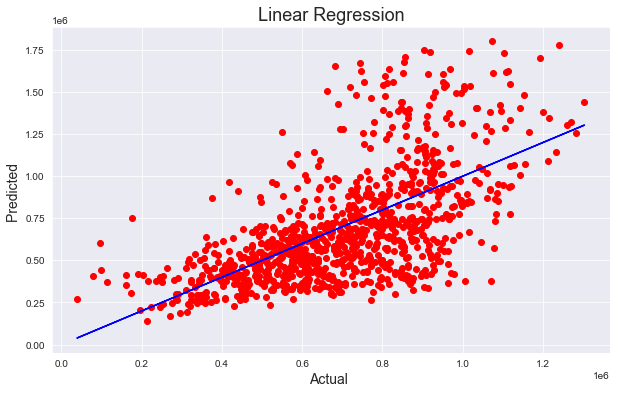

************************************************** 

Model MLPRegressor() 
 **************************************************
Training Accuracy r2_score  -4.222774093185182 Testing Accuracy R2_score  -4.336700703301604
Training Mean_squared_Error  585641456253.1588 Testing Mean_squared_error  576761075488.8177
Training Absolute_Error  688350.5090764015 Testing Absolute Error 684828.5884618845

 MLPRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score-4.28 Train Score-4.22 Testing Score-4.34
CROSS_FOLD 3, CV_Score-4.27 Train Score-4.22 Testing Score-4.34
CROSS_FOLD 4, CV_Score-4.27 Train Score-4.22 Testing Score-4.34
CROSS_FOLD 5, CV_Score-4.31 Train Score-4.22 Testing Score-4.34
CROSS_FOLD 6, CV_Score-4.37 Train Score-4.22 Testing Score-4.34
CROSS_FOLD 7, CV_Score-4.37 Train Score-4.22 Testing Score-4.34
CROSS_FOLD 8, CV_Score-4.37 Train Score-4.22 Testing Score-4.34
CROSS_FOLD 9, CV_Score-4.36 Train Score-4.22 Testing Score-4.34

Model Graph


In [81]:
models=[dtc,knn,svm,rf,gb,bg,ada,et,sgd,mlp]

for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    
    #predict
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    print("*****"*10,"\n", )
    print("Model",m,"\n","*****"*10)
    print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
    print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
    print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))
    print("\n"*1,m,"Model Cross Validation","\n")
    
    #training accuracy.
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)

    for i in range(2,10):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()

        print(f"CROSS_FOLD {i}, CV_Score{round(cv_mean,2)} Train Score{round(train_accuracy,2)} Testing Score{round(test_accuracy,2)}")
        
    print("\nModel Graph")
    
    plt.figure(figsize=(10,6))
    plt.scatter(x=pred_test,y=y_test,color='r')
    plt.plot(pred_test,pred_test,color='b')
    plt.xlabel('Actual ',fontsize=14)
    plt.ylabel('Predicted ',fontsize=14)
    plt.title("Linear Regression",fontsize=18)
    plt.show()
    

## Hyper-Parameter With Models

Extra Trees Regressor and Random Forest, Bagging Regressor are working very close

we selected them due the following reasons:

- R2 Score is better for the model.
- CV Score better for these model they are nearer to training score.
- "MSE" and "MAE" are less on compare to other models.(They are close to the mean)


## Extra Trees Regressor

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

parameters={'n_estimators':[100,180,200],
            'criterion':['squared_error', 'absolute_error'],
            'max_features':['sqrt', 'log2','None',1.0]}

gsv=GridSearchCV(etr,parameters,cv=6)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'criterion': 'absolute_error', 'max_features': 1.0, 'n_estimators': 200} Best Score  0.8773388968341194


In [83]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(criterion= 'absolute_error',n_estimators= 200,max_features= 1.0, n_jobs=2,
                        random_state=98,max_depth=2500,min_samples_split=2,min_impurity_decrease=0.00001)

#training score
etr.fit(x_train,y_train)
etr_score=etr.score(x_train,y_train)

#predict
pred_train1=etr.predict(x_train)
pred_test1=etr.predict(x_test)

#result
print("Training Score",etr_score)
print("Training Accuracy r2_score ",r2_score(y_train,pred_train1),"Testing Accuracy R2_score ",r2_score(y_test,pred_test1))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train1),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test1))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train1),"Testing Absolute Error",mean_absolute_error(y_test,pred_test1)) 

Training Score 0.9996967682951887
Training Accuracy r2_score  0.9996967682951887 Testing Accuracy R2_score  0.86353793826997
Training Mean_squared_Error  34002055.99922469 Testing Mean_squared_error  14748064368.33552
Training Absolute_Error  1884.0144897523487 Testing Absolute Error 70877.8299252988


## Model Cross Validation Score

In [84]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train1)
test_accuracy=r2_score(y_test,pred_test1)

for i in range(2,10):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score 0.8133597433357721 ,Training Score is 0.9996967682951887,Testing Score0.86353793826997
At CROSS_FOLD 3, The Cross_Val_Score 0.8676977028419266 ,Training Score is 0.9996967682951887,Testing Score0.86353793826997
At CROSS_FOLD 4, The Cross_Val_Score 0.8647110564452376 ,Training Score is 0.9996967682951887,Testing Score0.86353793826997
At CROSS_FOLD 5, The Cross_Val_Score 0.8777053207908854 ,Training Score is 0.9996967682951887,Testing Score0.86353793826997
At CROSS_FOLD 6, The Cross_Val_Score 0.8846437267391186 ,Training Score is 0.9996967682951887,Testing Score0.86353793826997
At CROSS_FOLD 7, The Cross_Val_Score 0.8830110488190355 ,Training Score is 0.9996967682951887,Testing Score0.86353793826997
At CROSS_FOLD 8, The Cross_Val_Score 0.8818862797859622 ,Training Score is 0.9996967682951887,Testing Score0.86353793826997
At CROSS_FOLD 9, The Cross_Val_Score 0.886047405359066 ,Training Score is 0.9996967682951887,Testing Score0.86353793826997


## Cross Validation

In [85]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train1)
test_accuracy=r2_score(y_test,pred_test1)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=8) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.8818862797859622  The Training Score is 0.9996967682951887 Testing Score Stands  0.86353793826997


## Graph

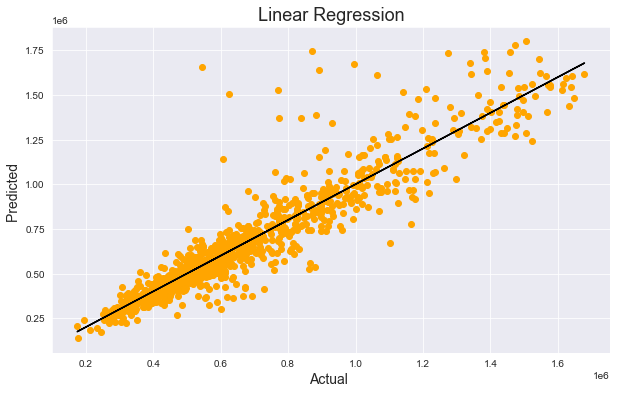

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test1,y=y_test,color='orange')
plt.plot(pred_test1,pred_test1,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [87]:
from sklearn.linear_model import ElasticNet

parameters={'alpha':[.0001,.001,.01,.1,1.0],'random_state':list(range(0,10)),'max_iter':[1000,3000,5000],'tol':[1e-4,1e-5,1e-6],
           'random_state':[98],'selection':['cyclic', 'random']}

ls=ElasticNet()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)


print("Best Parameter ",clf.best_params_,"Best Score ",clf.best_score_)

Best Parameter  {'alpha': 0.01, 'max_iter': 1000, 'random_state': 98, 'selection': 'random', 'tol': 1e-05} Best Score  0.3986231950913488


In [88]:
# final training
ls=ElasticNet(alpha=0.01,random_state=98,max_iter=1000,selection='cyclic',tol=1e-06)
ls.fit(x_train,y_train)

#score
ls_score_training=ls.score(x_train,y_train) 
ls_score_training*100

40.70134791838388

In [89]:
pred_en=ls.predict(x_test) # predict test

cv_score=cross_val_score(etr,x,y,cv=8)
cv_mean=cv_score.mean()
cv_mean*100

88.18862797859623

In [90]:
lss = r2_score(y_test,pred_en)
lss*100

37.90301867491843

In [91]:
cv_score=cross_val_score(etr,x,y,cv=8)
cv_mean=cv_score.mean()
cv_mean*100

88.18862797859623

## Random Forest Regressor

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

parameters={'n_estimators':[200],
            'criterion':['squared_error', 'absolute_error','poisson'],
            'max_features':['sqrt', 'log2','None',1.0],
           'random_state':[98],
           'ccp_alpha':[0.0,0.01]}

gsv=GridSearchCV(rfr,parameters,cv=6)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'ccp_alpha': 0.0, 'criterion': 'poisson', 'max_features': 1.0, 'n_estimators': 200, 'random_state': 98} Best Score  0.872338986828565


In [93]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(criterion= 'squared_error',n_estimators= 100,max_features= 1.0,max_depth=200,
                        random_state=0,min_samples_split=2,min_impurity_decrease=0.000001,max_leaf_nodes=None)

#training score
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

#predict
pred_train2=rfr.predict(x_train)
pred_test2=rfr.predict(x_test)

#result

print("Training Accuracy r2_score ",r2_score(y_train,pred_train2),"Testing Accuracy R2_score ",r2_score(y_test,pred_test2))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train2),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test2))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train2),"Testing Absolute Error",mean_absolute_error(y_test,pred_test2)) 

Training Accuracy r2_score  0.98380599588031 Testing Accuracy R2_score  0.8655327307692353
Training Mean_squared_Error  1815870260.9020956 Testing Mean_squared_error  14532478235.401093
Training Absolute_Error  26176.536353340653 Testing Absolute Error 70726.95048947068


In [94]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train2)
test_accuracy=r2_score(y_test,pred_test2)

for i in range(2,10):
    cv_score=cross_val_score(rfr,x,y,cv=i)
    cv_mean=cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score 0.8246141368034668 ,Training Score is 0.98380599588031,Testing Score0.8655327307692353
At CROSS_FOLD 3, The Cross_Val_Score 0.8726372509622017 ,Training Score is 0.98380599588031,Testing Score0.8655327307692353
At CROSS_FOLD 4, The Cross_Val_Score 0.8700910590074492 ,Training Score is 0.98380599588031,Testing Score0.8655327307692353
At CROSS_FOLD 5, The Cross_Val_Score 0.8762184724951343 ,Training Score is 0.98380599588031,Testing Score0.8655327307692353
At CROSS_FOLD 6, The Cross_Val_Score 0.8848088531965702 ,Training Score is 0.98380599588031,Testing Score0.8655327307692353
At CROSS_FOLD 7, The Cross_Val_Score 0.8825256535431211 ,Training Score is 0.98380599588031,Testing Score0.8655327307692353
At CROSS_FOLD 8, The Cross_Val_Score 0.8821699468737012 ,Training Score is 0.98380599588031,Testing Score0.8655327307692353
At CROSS_FOLD 9, The Cross_Val_Score 0.8867448218595144 ,Training Score is 0.98380599588031,Testing Score0.8655327307692353


In [95]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train2)
test_accuracy=r2_score(y_test,pred_test2)

#cross val with Extra Trees
cv_score=cross_val_score(rfr,x,y,cv=6) 
cv_mean=cv_score.mean() #mean value

print("Cv_score of Model is ",cv_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.8848088531965702  The Training Score is 0.98380599588031 Testing Score Stands  0.8655327307692353


In [96]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test2,y=y_test,color='orange')
plt.plot(pred_test2,pred_test2,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [97]:
from sklearn.linear_model import ElasticNet

parameters={'alpha':[.0001,.001,.01,.1,1.0],'random_state':list(range(0,10)),'max_iter':[1000,3000,5000],'tol':[1e-4,1e-5,1e-6],
           'random_state':[98],'selection':['cyclic', 'random']}

ls=ElasticNet()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)


print("Best Parameter ",clf.best_params_,"Best Score ",clf.best_score_)

Best Parameter  {'alpha': 0.01, 'max_iter': 1000, 'random_state': 98, 'selection': 'random', 'tol': 1e-05} Best Score  0.3986231950913488


In [98]:
# final training
ls=ElasticNet(alpha=0.01,random_state=98,max_iter=1000,selection='cyclic',tol=1e-06)
ls.fit(x_train,y_train)

#score
ls_score_training=ls.score(x_train,y_train) 
ls_score_training*100

40.70134791838388

In [99]:
pred_en=ls.predict(x_test) # predict test

cv_score=cross_val_score(rfr,x,y,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

88.48088531965702

In [100]:
lss = r2_score(y_test,pred_en)
lss*100

37.90301867491843

In [101]:
cv_score=cross_val_score(rfr,x,y,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

88.48088531965702

#### MODEL Extra Trees Shows accuracy and CV_Score both around 88%, Shows our model is performing extremly well....

## Saving Best Model

In [102]:
import pickle
filename='cars.pkl'
pickle.dump(etr,open(filename,'wb'))

In [103]:
# Opening back
import pickle
model =pickle.load(open('cars.pkl','rb'))
result=model.score(x_test,y_test)
print(result*100)

86.353793826997


In [104]:
Final_Result=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

Final_Result

0         1           2         3         4          5     \
Predicted  509648.0  686577.0  1340023.75  403936.0  587079.0  361351.75   
Original   449599.0  673299.0  1680599.00  403599.0  510399.0  373699.00   

               6         7          8         9         10         11    \
Predicted  496430.0  329419.5  407080.75  361040.5  453263.5  788484.75   
Original   454699.0  326899.0  371999.00  354499.0  412649.0  572299.00   

                12         13          14        15         16        17    \
Predicted  341750.55  1117018.7  710095.415  682279.5  324714.25  309965.0   
Original   351499.00   959899.0  623999.000  642899.0  373399.00  329799.0   

               18        19        20        21         22        23    \
Predicted  393248.5  761021.5  781221.5  559417.0  541162.75  680486.0   
Original   407299.0  910299.0  741999.0  562399.0  573199.00  764999.0   

               24        25         26         27        28        29    \
Predicted  728856.5  676965.5  983795.75  670844.25  896580.5  409580.0   
Original   855199.0  580149.0  913299.00  514299.00  739499.0  479899.0   

               30        31        32         33         34         35    \
Predicted  243803.5  748934.0  442434.5  452264.25  283648.75  1236734.0   
Original   171499.0  720799.0  460699.0  390699.00  304899.00  1481699.0   

               36        37        38         39        40         41    \
Predicted  319324.5  344480.5  605515.5  777499.25  532041.0  429582.25   
Original   346099.0  313699.0  677599.0  664899.00  548699.0  430699.00   

               42         43         44          45         46        47    \
Predicted  194927.5  458727.75  1216301.0   806817.25  1624841.5  532894.5   
Original   239999.0  457899.00  1259999.0  1031099.00  1595499.0  511799.0   

                 48        49        50         51        52        53    \
Predicted  960259.005  666965.0  845535.5  466651.75  383176.5  324640.5   
Original   745499.000  376099.0  980899.0  447399.00  372299.0  292099.0   

                54        55        56         57          58        59    \
Predicted  1480703.0  665168.5  670929.0  594233.75  1431448.75  447924.0   
Original   1536799.0  544099.0  604199.0  589599.00  1287999.00  489399.0   

               60        61         62         63        64        65    \
Predicted  655640.5  898395.5  1479815.0  1159345.2  367260.5  284253.5   
Original   649999.0  814099.0  1385399.0   965399.0  341499.0  269999.0   

               66        67        68         69         70         71    \
Predicted  727631.5  175698.5  636024.0  604159.25  760038.75  339739.75   
Original   412099.0  139099.0  365599.0  564699.00  565099.00  393299.00   

               72        73        74         75         76        77    \
Predicted  451633.0  442687.5  692175.0  352335.75  543332.75  467210.5   
Original   444799.0  483899.0  694299.0  422099.00  667499.00  562199.0   

               78         79        80         81         82        83    \
Predicted  250140.0   769002.0  375351.0  774365.45  1478166.5  424242.0   
Original   272599.0  1527899.0  405999.0  699899.00  1422199.0  443699.0   

                84          85        86         87         88        89    \
Predicted  1166940.0  1236875.75  567980.0  392577.25  777396.75  614434.0   
Original    930699.0  1069649.00  621799.0  354199.00  748399.00  732899.0   

                90        91        92        93        94        95    \
Predicted  1363624.5  394589.0  683819.5  916476.5  732221.5  409370.5   
Original   1501299.0  380199.0  702599.0  946199.0  880699.0  403499.0   

               96        97         98          99        100         101   \
Predicted  840579.5  677502.5  890882.25  1380626.75  613638.0  1141971.75   
Original   774099.0  740299.0  892199.00  1739599.00  872999.0  1516699.00   

               102        103       104       105         106       107   \
Predicted  732707.5  1305889.0  441502.0  3971